In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

In [2]:
response = requests.get("https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off")
response

<Response [200]>

In [3]:
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e82689.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><l

In [5]:
print('Title',soup.title.text)

Title Phone- Buy Products Online at Best Price in India - All Categories | Flipkart.com


In [6]:
soup.find_all('div',class_= '_4rR01T')

[<div class="_4rR01T">vivo T2 5G (Nitro Blaze, 128 GB)</div>,
 <div class="_4rR01T">vivo T2 5G (Velocity Wave, 128 GB)</div>,
 <div class="_4rR01T">vivo T2 5G (Nitro Blaze, 128 GB)</div>,
 <div class="_4rR01T">SAMSUNG Galaxy F04 (Opal Green, 64 GB)</div>,
 <div class="_4rR01T">vivo T2 5G (Velocity Wave, 128 GB)</div>,
 <div class="_4rR01T">Motorola G34 5G (Ocean Green, 128 GB)</div>,
 <div class="_4rR01T">Apple iPhone 15 (Blue, 128 GB)</div>,
 <div class="_4rR01T">POCO C51 (Royal Blue, 64 GB)</div>,
 <div class="_4rR01T">Apple iPhone 15 (Black, 128 GB)</div>,
 <div class="_4rR01T">Motorola G34 5G (Ice Blue, 128 GB)</div>,
 <div class="_4rR01T">vivo T2x 5G (Marine Blue, 128 GB)</div>,
 <div class="_4rR01T">vivo T2x 5G (Aurora Gold, 128 GB)</div>,
 <div class="_4rR01T">vivo T2x 5G (Marine Blue, 128 GB)</div>,
 <div class="_4rR01T">vivo T2x 5G (Aurora Gold, 128 GB)</div>,
 <div class="_4rR01T">vivo T2x 5G (Glimmer Black, 128 GB)</div>,
 <div class="_4rR01T">vivo T2x 5G (Aurora Gold, 128 G

In [7]:
len(soup.find_all('div',class_= '_4rR01T'))

24

In [8]:
soup.find_all('div',class_= '_4rR01T')[0].text

'vivo T2 5G (Nitro Blaze, 128 GB)'

In [9]:
soup.find('div',class_= '_4rR01T').text

'vivo T2 5G (Nitro Blaze, 128 GB)'

In [10]:
product =  soup.find_all('div',class_= "_3pLy-c row" )
len(product)

24

In [11]:
for i in soup.find_all('div',class_= '_4rR01T'):
    print(i.text)
#     Product_Name.append(np.nan)

vivo T2 5G (Nitro Blaze, 128 GB)
vivo T2 5G (Velocity Wave, 128 GB)
vivo T2 5G (Nitro Blaze, 128 GB)
SAMSUNG Galaxy F04 (Opal Green, 64 GB)
vivo T2 5G (Velocity Wave, 128 GB)
Motorola G34 5G (Ocean Green, 128 GB)
Apple iPhone 15 (Blue, 128 GB)
POCO C51 (Royal Blue, 64 GB)
Apple iPhone 15 (Black, 128 GB)
Motorola G34 5G (Ice Blue, 128 GB)
vivo T2x 5G (Marine Blue, 128 GB)
vivo T2x 5G (Aurora Gold, 128 GB)
vivo T2x 5G (Marine Blue, 128 GB)
vivo T2x 5G (Aurora Gold, 128 GB)
vivo T2x 5G (Glimmer Black, 128 GB)
vivo T2x 5G (Aurora Gold, 128 GB)
vivo T2x 5G (Glimmer Black, 128 GB)
vivo T2x 5G (Glimmer Black, 128 GB)
Apple iPhone 15 (Pink, 128 GB)
SAMSUNG Galaxy F04 (Jade Purple, 64 GB)
SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)
Apple iPhone 14 (Blue, 128 GB)
POCO C51 (Power Black, 64 GB)
Apple iPhone 15 (Green, 128 GB)


In [12]:
len(i)

1

#### Single_page web sraping 

In [13]:
Product_Name = []
Price = []
Rating = []
Reviw_Rating = []

Rom = []
Display = []
Camera = []
Battery = []
Processor = []


for i in product:
    product_name = i.find('div',class_= '_4rR01T')
    if product_name is None:
        Product_Name.append(np.nan)
    else:
        Product_Name.append(product_name.text)  
        
   
    price = i.find("div",class_= "_30jeq3 _1_WHN1")
    if price is None:
        Price.append(np.nan)
    else:
        Price.append(price.text)

    
    rating = i.find('div', class_='_3LWZlK')
    if rating is None:
        Rating.append(np.nan)
    else:
        Rating.append(rating.text)
     
   
    Re_and_Ra = i.find('span',class_= '_2_R_DZ')
    if Re_and_Ra is None:
        Reviw_Rating.append(np.nan)
    else:
        Reviw_Rating.append(Re_and_Ra.text)
  

    mob_list = i.find_all("li", class_='rgWa7D')

    if len(mob_list) >= 1:
        rom = mob_list[0].text
        if rom is None:
            Rom.append(np.nan)
        else:
            Rom.append(rom)

        display = mob_list[1].text
        if display is None:
            Display.append(np.nan)
        else:
            Display.append(display)

        camera = mob_list[2].text
        if camera is None:
            Camera.append(np.nan)
        else:
            Camera.append(camera)
        
        battery = mob_list[3].text
        if battery is None:
            Battery.append(np.nan)
        else:
            Battery.append(battery)
            
        processor = mob_list[4].text
        if processor is None:
            Processor.append(np.nan)
        else:
            Processor.append(processor)
        


In [14]:
Product_Name

['vivo T2 5G (Nitro Blaze, 128 GB)',
 'vivo T2 5G (Velocity Wave, 128 GB)',
 'vivo T2 5G (Nitro Blaze, 128 GB)',
 'SAMSUNG Galaxy F04 (Opal Green, 64 GB)',
 'vivo T2 5G (Velocity Wave, 128 GB)',
 'Motorola G34 5G (Ocean Green, 128 GB)',
 'Apple iPhone 15 (Blue, 128 GB)',
 'POCO C51 (Royal Blue, 64 GB)',
 'Apple iPhone 15 (Black, 128 GB)',
 'Motorola G34 5G (Ice Blue, 128 GB)',
 'vivo T2x 5G (Marine Blue, 128 GB)',
 'vivo T2x 5G (Aurora Gold, 128 GB)',
 'vivo T2x 5G (Marine Blue, 128 GB)',
 'vivo T2x 5G (Aurora Gold, 128 GB)',
 'vivo T2x 5G (Glimmer Black, 128 GB)',
 'vivo T2x 5G (Aurora Gold, 128 GB)',
 'vivo T2x 5G (Glimmer Black, 128 GB)',
 'vivo T2x 5G (Glimmer Black, 128 GB)',
 'Apple iPhone 15 (Pink, 128 GB)',
 'SAMSUNG Galaxy F04 (Jade Purple, 64 GB)',
 'SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)',
 'Apple iPhone 14 (Blue, 128 GB)',
 'POCO C51 (Power Black, 64 GB)',
 'Apple iPhone 15 (Green, 128 GB)']

In [15]:
Price

['₹17,999',
 '₹15,999',
 '₹15,999',
 '₹5,999',
 '₹17,999',
 '₹11,999',
 '₹65,999',
 '₹5,499',
 '₹65,999',
 '₹11,999',
 '₹12,999',
 '₹14,999',
 '₹11,999',
 '₹12,999',
 '₹12,999',
 '₹11,999',
 '₹11,999',
 '₹14,999',
 '₹65,999',
 '₹5,999',
 '₹9,990',
 '₹57,999',
 '₹5,499',
 '₹65,999']

In [16]:
Rating

['4.3',
 '4.4',
 '4.4',
 '4.2',
 '4.3',
 '4.2',
 '4.6',
 '4',
 '4.6',
 '4.2',
 '4.4',
 '4.3',
 '4.4',
 '4.4',
 '4.4',
 '4.4',
 '4.4',
 '4.3',
 '4.6',
 '4.2',
 '4.2',
 '4.6',
 '4',
 '4.6']

In [17]:
Reviw_Rating

['16,558 Ratings\xa0&\xa01,164 Reviews',
 '94,257 Ratings\xa0&\xa06,198 Reviews',
 '94,257 Ratings\xa0&\xa06,198 Reviews',
 '96,352 Ratings\xa0&\xa05,498 Reviews',
 '16,558 Ratings\xa0&\xa01,164 Reviews',
 '5,217 Ratings\xa0&\xa0736 Reviews',
 '13,234 Ratings\xa0&\xa0896 Reviews',
 '1,77,887 Ratings\xa0&\xa09,900 Reviews',
 '13,234 Ratings\xa0&\xa0896 Reviews',
 '5,217 Ratings\xa0&\xa0736 Reviews',
 '3,42,276 Ratings\xa0&\xa019,213 Reviews',
 '62,599 Ratings\xa0&\xa03,749 Reviews',
 '1,56,140 Ratings\xa0&\xa08,325 Reviews',
 '3,42,276 Ratings\xa0&\xa019,213 Reviews',
 '3,42,276 Ratings\xa0&\xa019,213 Reviews',
 '1,56,140 Ratings\xa0&\xa08,325 Reviews',
 '1,56,140 Ratings\xa0&\xa08,325 Reviews',
 '62,599 Ratings\xa0&\xa03,749 Reviews',
 '13,234 Ratings\xa0&\xa0896 Reviews',
 '96,352 Ratings\xa0&\xa05,498 Reviews',
 '35,855 Ratings\xa0&\xa02,376 Reviews',
 '2,75,020 Ratings\xa0&\xa010,790 Reviews',
 '1,77,887 Ratings\xa0&\xa09,900 Reviews',
 '13,234 Ratings\xa0&\xa0896 Reviews']

In [18]:
Rom

['8 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '4 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB',
 '128 GB ROM',
 '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '128 GB ROM']

In [19]:
Display

['16.21 cm (6.38 inch) Full HD+ Display',
 '16.21 cm (6.38 inch) Full HD+ Display',
 '16.21 cm (6.38 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) HD Display',
 '16.21 cm (6.38 inch) Full HD+ Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '16.56 cm (6.52 inch) HD+ Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '16.51 cm (6.5 inch) HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '16.71 cm (6.58 inch) Full HD+ Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '16.51 cm (6.5 inch) HD Display',
 '16.76 cm (6.6 inch) Full HD+ Display',
 '15.49 cm (6.1 inch) Super Retina XDR Display',
 '16.56 cm (6.52 inch) HD+ Display',
 '15.49 cm (6.1 inch) Super Retina XDR Disp

In [20]:
Camera

['64 MP (OIS) + 2MP | 16MP Front Camera',
 '64 MP (OIS) + 2MP | 16MP Front Camera',
 '64 MP (OIS) + 2MP | 16MP Front Camera',
 '13MP + 2MP | 5MP Front Camera',
 '64 MP (OIS) + 2MP | 16MP Front Camera',
 '50MP + 2MP | 16MP Front Camera',
 '48MP + 12MP | 12MP Front Camera',
 '8MP Dual Rear Camera | 5MP Front Camera',
 '48MP + 12MP | 12MP Front Camera',
 '50MP + 2MP | 16MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '50MP + 2MP | 8MP Front Camera',
 '48MP + 12MP | 12MP Front Camera',
 '13MP + 2MP | 5MP Front Camera',
 '50MP + 2MP | 13MP Front Camera',
 '12MP + 12MP | 12MP Front Camera',
 '8MP Dual Rear Camera | 5MP Front Camera',
 '48MP + 12MP | 12MP Front Camera']

In [21]:
Battery

['4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '5000 mAh Lithium-Ion Battery',
 '4500 mAh Battery',
 '5000 mAh Battery',
 'A16 Bionic Chip, 6 Core Processor Processor',
 '5000 mAh Battery',
 'A16 Bionic Chip, 6 Core Processor Processor',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 'A16 Bionic Chip, 6 Core Processor Processor',
 '5000 mAh Lithium-Ion Battery',
 '6000 mAh Battery',
 'A15 Bionic Chip, 6 Core Processor Processor',
 '5000 mAh Battery',
 'A16 Bionic Chip, 6 Core Processor Processor']

In [22]:
Processor

['Snapdragon 695 Processor',
 'Snapdragon 695 Processor',
 'Snapdragon 695 Processor',
 'Mediatek Helio P35 Processor',
 'Snapdragon 695 Processor',
 'Snapdragon 695 5G Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories',
 'Helio G36 Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories',
 'Snapdragon 695 5G Processor',
 'Mediatek Dimensity 6020 Processor',
 'Mediatek Dimensity 6020 Processor',
 'Mediatek Dimensity 6020 Processor',
 'Mediatek Dimensity 6020 Processor',
 'Mediatek Dimensity 6020 Processor',
 'Mediatek Dimensity 6020 Processor',
 'Mediatek Dimensity 6020 Processor',
 'Mediatek Dimensity 6020 Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories',
 'Mediatek Helio P35 Processor',
 'Exynos 1330, Octa Core Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories',
 'Helio G36 Processor',
 '1 Year Warranty for Phone and 6 Months Warranty for In-Box Acce

In [23]:
print(len(Product_Name))
print(len(Price))
print(len(Rating))
print(len(Reviw_Rating))

print(len(Rom))
print(len(Display))
print(len(Camera))
print(len(Battery))
print(len(Processor))

24
24
24
24
24
24
24
24
24


In [24]:
data = {
    'Product_name':Product_Name,
    'Price' :Price,
    'Rating':Rating,
    'Revieew_&_Rating':Reviw_Rating,
    'ROM_Feature':Rom,
    'Display_Feature':Display,
    'Camera_Feature':Camera,
    'Battery':Battery,
    'Processor_Feature':Processor,
}

In [25]:
df = pd.DataFrame(data)
df

Product_name    Price Rating  \
0                vivo T2 5G (Nitro Blaze, 128 GB)  ₹17,999    4.3   
1              vivo T2 5G (Velocity Wave, 128 GB)  ₹15,999    4.4   
2                vivo T2 5G (Nitro Blaze, 128 GB)  ₹15,999    4.4   
3          SAMSUNG Galaxy F04 (Opal Green, 64 GB)   ₹5,999    4.2   
4              vivo T2 5G (Velocity Wave, 128 GB)  ₹17,999    4.3   
5           Motorola G34 5G (Ocean Green, 128 GB)  ₹11,999    4.2   
6                  Apple iPhone 15 (Blue, 128 GB)  ₹65,999    4.6   
7                    POCO C51 (Royal Blue, 64 GB)   ₹5,499      4   
8                 Apple iPhone 15 (Black, 128 GB)  ₹65,999    4.6   
9              Motorola G34 5G (Ice Blue, 128 GB)  ₹11,999    4.2   
10              vivo T2x 5G (Marine Blue, 128 GB)  ₹12,999    4.4   
11              vivo T2x 5G (Aurora Gold, 128 GB)  ₹14,999    4.3   
12              vivo T2x 5G (Marine Blue, 128 GB)  ₹11,999    4.4   
13              vivo T2x 5G (Aurora Gold, 128 GB)  ₹12,999    4.4   
14            vivo T2x 5G (Glimmer Black, 128 GB)  ₹12,999    4.4   
15              vivo T2x 5G (Aurora Gold, 128 GB)  ₹11,999    4.4   
16            vivo T2x 5G (Glimmer Black, 128 GB)  ₹11,999    4.4   
17            vivo T2x 5G (Glimmer Black, 128 GB)  ₹14,999    4.3   
18                 Apple iPhone 15 (Pink, 128 GB)  ₹65,999    4.6   
19        SAMSUNG Galaxy F04 (Jade Purple, 64 GB)   ₹5,999    4.2   
20  SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)   ₹9,990    4.2   
21                 Apple iPhone 14 (Blue, 128 GB)  ₹57,999    4.6   
22                  POCO C51 (Power Black, 64 GB)   ₹5,499      4   
23                Apple iPhone 15 (Green, 128 GB)  ₹65,999    4.6   

                     Revieew_&_Rating  \
0      16,558 Ratings & 1,164 Reviews   
1      94,257 Ratings & 6,198 Reviews   
2      94,257 Ratings & 6,198 Reviews   
3      96,352 Ratings & 5,498 Reviews   
4      16,558 Ratings & 1,164 Reviews   
5         5,217 Ratings & 736 Reviews   
6        13,234 Ratings & 896 Reviews   
7    1,77,887 Ratings & 9,900 Reviews   
8        13,234 Ratings & 896 Reviews   
9         5,217 Ratings & 736 Reviews   
10  3,42,276 Ratings & 19,213 Reviews   
11     62,599 Ratings & 3,749 Reviews   
12   1,56,140 Ratings & 8,325 Reviews   
13  3,42,276 Ratings & 19,213 Reviews   
14  3,42,276 Ratings & 19,213 Reviews   
15   1,56,140 Ratings & 8,325 Reviews   
16   1,56,140 Ratings & 8,325 Reviews   
17     62,599 Ratings & 3,749 Reviews   
18       13,234 Ratings & 896 Reviews   
19     96,352 Ratings & 5,498 Reviews   
20     35,855 Ratings & 2,376 Reviews   
21  2,75,020 Ratings & 10,790 Reviews   
22   1,77,887 Ratings & 9,900 Reviews   
23       13,234 Ratings & 896 Reviews   

                                     ROM_Feature  \
0                          8 GB RAM | 128 GB ROM   
1                          6 GB RAM | 128 GB ROM   
2                          6 GB RAM | 128 GB ROM   
3    4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
4                          8 GB RAM | 128 GB ROM   
5                          8 GB RAM | 128 GB ROM   
6                                     128 GB ROM   
7    4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
8                                     128 GB ROM   
9                          8 GB RAM | 128 GB ROM   
10                         6 GB RAM | 128 GB ROM   
11                         8 GB RAM | 128 GB ROM   
12                         4 GB RAM | 128 GB ROM   
13                         6 GB RAM | 128 GB ROM   
14                         6 GB RAM | 128 GB ROM   
15                         4 GB RAM | 128 GB ROM   
16                         4 GB RAM | 128 GB ROM   
17                         8 GB RAM | 128 GB ROM   
18                                    128 GB ROM   
19   4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
20  4 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
21                                    128 GB ROM   
22   4 GB RAM | 64 GB ROM | Expandable Upto 1 TB   
23                                   

In [26]:
df.shape

(24, 9)

#### Multi_page web sraping 

In [30]:
Product_Name = []
Price = []
Rating = []
Reviw_Rating = []

Rom = []
Display = []
Camera = []
Battery = []
Processor = []

for j in range(1,50):
    response = "https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}".format(j)
    mul_page = requests.get(response)
    soup = BeautifulSoup(mul_page.content, 'html.parser')
    
    product =  soup.find_all('div',class_= "_3pLy-c row" )
    for i in product:

        product_name = i.find('div',class_= '_4rR01T')
        if product_name is None:
            Product_Name.append(np.nan)
        else:
            Product_Name.append(product_name.text)  


        price = i.find("div",class_= "_30jeq3 _1_WHN1")
        if price is None:
            Price.append(np.nan)
        else:
            Price.append(price.text)


        rating = i.find('div', class_='_3LWZlK')
        if rating is None:
            Rating.append(np.nan)
        else:
            Rating.append(rating.text)


        Re_and_Ra = i.find('span',class_= '_2_R_DZ')
        if Re_and_Ra is None:
            Reviw_Rating.append(np.nan)
        else:
            Reviw_Rating.append(Re_and_Ra.text)


        mob_list = i.find_all("li", class_='rgWa7D')

        if len(mob_list) >= 1:
            rom = mob_list[0].text
            if rom is None:
                Rom.append(np.nan)
            else:
                Rom.append(rom)

            display = mob_list[1].text
            if display is None:
                Display.append(np.nan)
            else:
                Display.append(display)

            camera = mob_list[2].text
            if camera is None:
                Camera.append(np.nan)
            else:
                Camera.append(camera)

            battery = mob_list[3].text
            if battery is None:
                Battery.append(np.nan)
            else:
                Battery.append(battery)
                
    end_time = time.time()
    print('page {} complited in {}'.format(j,end_time))

page 1 complited in 1707746449.5317087
page 2 complited in 1707746453.0023718
page 3 complited in 1707746455.4988303
page 4 complited in 1707746457.6061335
page 5 complited in 1707746460.4913666
page 6 complited in 1707746464.6311243
page 7 complited in 1707746467.0971076
page 8 complited in 1707746469.8742833
page 9 complited in 1707746472.675002
page 10 complited in 1707746475.231711
page 11 complited in 1707746476.8655996
page 12 complited in 1707746478.3949337
page 13 complited in 1707746480.38057
page 14 complited in 1707746481.8945746
page 15 complited in 1707746482.7615387
page 16 complited in 1707746489.0096767
page 17 complited in 1707746491.1111274
page 18 complited in 1707746494.122922
page 19 complited in 1707746495.619621
page 20 complited in 1707746497.920804
page 21 complited in 1707746500.8290222
page 22 complited in 1707746504.9215074
page 23 complited in 1707746507.291981
page 24 complited in 1707746510.5045197
page 25 complited in 1707746514.6523657
page 26 complited

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [31]:
print(len(Product_Name))
print(len(Price))
print(len(Rating))
print(len(Reviw_Rating))

print(len(Rom))
print(len(Display))
print(len(Camera))
print(len(Battery))
print(len(Processor))

984
984
984
984
984
984
984
984
0


In [32]:
data = {
    'Product_name':Product_Name,
    'Price' :Price,
    'Rating':Rating,
    'Revieew_&_Rating':Reviw_Rating,
    'ROM_Feature':Rom,
    'Display_Feature':Display,
    'Camera_Feature':Camera,
    'Battery':Battery,
}

In [33]:
df = pd.DataFrame(data)
df

Product_name    Price Rating  \
0                Motorola G34 5G (Ocean Green, 128 GB)  ₹11,999    4.2   
1                       Apple iPhone 15 (Blue, 128 GB)  ₹65,999    4.6   
2                      Apple iPhone 15 (Black, 128 GB)  ₹65,999    4.6   
3                   Motorola G34 5G (Ice Blue, 128 GB)  ₹11,999    4.2   
4                       Apple iPhone 15 (Pink, 128 GB)  ₹65,999    4.6   
..                                                 ...      ...    ...   
979        SAMSUNG Galaxy S21 FE 5G (Graphite, 128 GB)  ₹32,999    4.3   
980  Xiaomi 11i Hypercharge 5G (Pacific Pearl, 128 GB)  ₹26,999    4.2   
981                                KARBONN Kphone Mini   ₹1,064    NaN   
982                                KARBONN Kphone Mini   ₹1,044    NaN   
983                  SAMSUNG Galaxy A03 (Black, 32 GB)   ₹9,999    4.1   

                      Revieew_&_Rating  \
0          5,217 Ratings & 736 Reviews   
1         13,234 Ratings & 896 Reviews   
2         13,234 Ratings & 896 Reviews   
3          5,217 Ratings & 736 Reviews   
4         13,234 Ratings & 896 Reviews   
..                                 ...   
979  1,29,392 Ratings & 12,546 Reviews   
980     12,553 Ratings & 1,218 Reviews   
981                                NaN   
982                                NaN   
983         1,046 Ratings & 60 Reviews   

                                      ROM_Feature  \
0                           8 GB RAM | 128 GB ROM   
1                                      128 GB ROM   
2                                      128 GB ROM   
3                           8 GB RAM | 128 GB ROM   
4                                      128 GB ROM   
..                                            ...   
979                         8 GB RAM | 128 GB ROM   
980  6 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
981                         32 MB RAM | 32 MB ROM   
982                         32 MB RAM | 32 MB ROM   
983                          3 GB RAM | 32 GB ROM   

                                  Display_Feature  \
0                 16.51 cm (6.5 inch) HD+ Display   
1    15.49 cm (6.1 inch) Super Retina XDR Display   
2    15.49 cm (6.1 inch) Super Retina XDR Display   
3                 16.51 cm (6.5 inch) HD+ Display   
4    15.49 cm (6.1 inch) Super Retina XDR Display   
..                                            ...   
979          16.26 cm (6.4 inch) Full HD+ Display   
980  16.94 cm (6.67 inch) Full HD+ AMOLED Display   
981                    4.57 cm (1.8 inch) Display   
982                    4.57 cm (1.8 inch) Display   
983               16.51 cm (6.5 inch) HD+ Display   

                                  Camera_Feature  \
0                 50MP + 2MP | 16MP Front Camera   
1                48MP + 12MP | 12MP Front Camera   
2                48MP + 12MP | 12MP Front Camera   
3                 50MP + 2MP | 16MP Front Camera   
4                48MP + 12MP | 12MP Front Camera   
..                                           ...   
979  12MP + 12MP + 8MP (OIS) | 32MP Front Camera   
980        108MP + 8MP + 2MP | 16MP Front Camera   
981                            0.3MP Rear Camera   
982                            0.3MP Rear Camera   
983                48MP + 2MP | 5MP Front Camera   

                                         Battery  
0                               5000 mAh Battery  
1    A16 Bionic Chip, 6 Core Processor Processor  
2    A16 Bionic Chip, 6 Core Processor Processor  
3                               5000 mAh Battery  
4    A16 Bionic Chip, 6 Core Processor Processor  
..                                           ...  
979                 4500 mAh Lithium-ion Battery  
980                  4500 mAh Li-Polymer Battery  
981                             1000 mAh Battery  
982                             1000 mAh Battery  
983                 5000 mAh Lithium Ion Battery  

[984 rows x 8 columns]

In [34]:
df.tail()

Product_name    Price Rating  \
979        SAMSUNG Galaxy S21 FE 5G (Graphite, 128 GB)  ₹32,999    4.3   
980  Xiaomi 11i Hypercharge 5G (Pacific Pearl, 128 GB)  ₹26,999    4.2   
981                                KARBONN Kphone Mini   ₹1,064    NaN   
982                                KARBONN Kphone Mini   ₹1,044    NaN   
983                  SAMSUNG Galaxy A03 (Black, 32 GB)   ₹9,999    4.1   

                      Revieew_&_Rating  \
979  1,29,392 Ratings & 12,546 Reviews   
980     12,553 Ratings & 1,218 Reviews   
981                                NaN   
982                                NaN   
983         1,046 Ratings & 60 Reviews   

                                      ROM_Feature  \
979                         8 GB RAM | 128 GB ROM   
980  6 GB RAM | 128 GB ROM | Expandable Upto 1 TB   
981                         32 MB RAM | 32 MB ROM   
982                         32 MB RAM | 32 MB ROM   
983                          3 GB RAM | 32 GB ROM   

                                  Display_Feature  \
979          16.26 cm (6.4 inch) Full HD+ Display   
980  16.94 cm (6.67 inch) Full HD+ AMOLED Display   
981                    4.57 cm (1.8 inch) Display   
982                    4.57 cm (1.8 inch) Display   
983               16.51 cm (6.5 inch) HD+ Display   

                                  Camera_Feature                       Battery  
979  12MP + 12MP + 8MP (OIS) | 32MP Front Camera  4500 mAh Lithium-ion Battery  
980        108MP + 8MP + 2MP | 16MP Front Camera   4500 mAh Li-Polymer Battery  
981                            0.3MP Rear Camera              1000 mAh Battery  
982                            0.3MP Rear Camera              1000 mAh Battery  
983                48MP + 2MP | 5MP Front Camera  5000 mAh Lithium Ion Battery

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_name      984 non-null    object
 1   Price             983 non-null    object
 2   Rating            966 non-null    object
 3   Revieew_&_Rating  966 non-null    object
 4   ROM_Feature       984 non-null    object
 5   Display_Feature   984 non-null    object
 6   Camera_Feature    984 non-null    object
 7   Battery           984 non-null    object
dtypes: object(8)
memory usage: 61.6+ KB


In [36]:
# String value replace and object change to float
df.Price = df.Price.str.replace('₹','').str.replace(',','').astype(float)
# df.Rating = df.Rating.astype(float)

In [37]:
df.Rating = df.Rating.astype(float)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      984 non-null    object 
 1   Price             983 non-null    float64
 2   Rating            966 non-null    float64
 3   Revieew_&_Rating  966 non-null    object 
 4   ROM_Feature       984 non-null    object 
 5   Display_Feature   984 non-null    object 
 6   Camera_Feature    984 non-null    object 
 7   Battery           984 non-null    object 
dtypes: float64(2), object(6)
memory usage: 61.6+ KB


In [39]:
df.isnull().sum()

Product_name         0
Price                1
Rating              18
Revieew_&_Rating    18
ROM_Feature          0
Display_Feature      0
Camera_Feature       0
Battery              0
dtype: int64

In [40]:
price_mean = df.Price.mean()
df.Price = df.Price.replace(np.nan, price_mean)
df.Price.isnull().sum()

0

In [41]:
df.drop_duplicates(inplace = True)

In [42]:
df.duplicated().sum()

0

In [43]:
df.shape

(783, 8)

In [44]:
df.nunique()

Product_name        630
Price               380
Rating               18
Revieew_&_Rating    385
ROM_Feature         109
Display_Feature     109
Camera_Feature      152
Battery             103
dtype: int64

In [45]:
print("Rating :", df.Rating.unique())

Rating : [4.2 4.6 4.3 4.4 4.  4.7 4.5 4.1 3.9 3.8 3.7 3.6 nan 3.1 4.9 3.4 5.  3.2
 3.5]


### Most rating categories

In [46]:
df.groupby(by = 'Rating')

In [47]:
df.Rating.value_counts()

4.3    164
4.2    154
4.1    104
4.4     85
4.0     71
4.6     61
3.9     38
4.5     27
3.8     22
3.7     16
4.7     11
3.6      9
4.9      2
3.4      2
3.2      2
3.5      2
3.1      1
5.0      1
Name: Rating, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

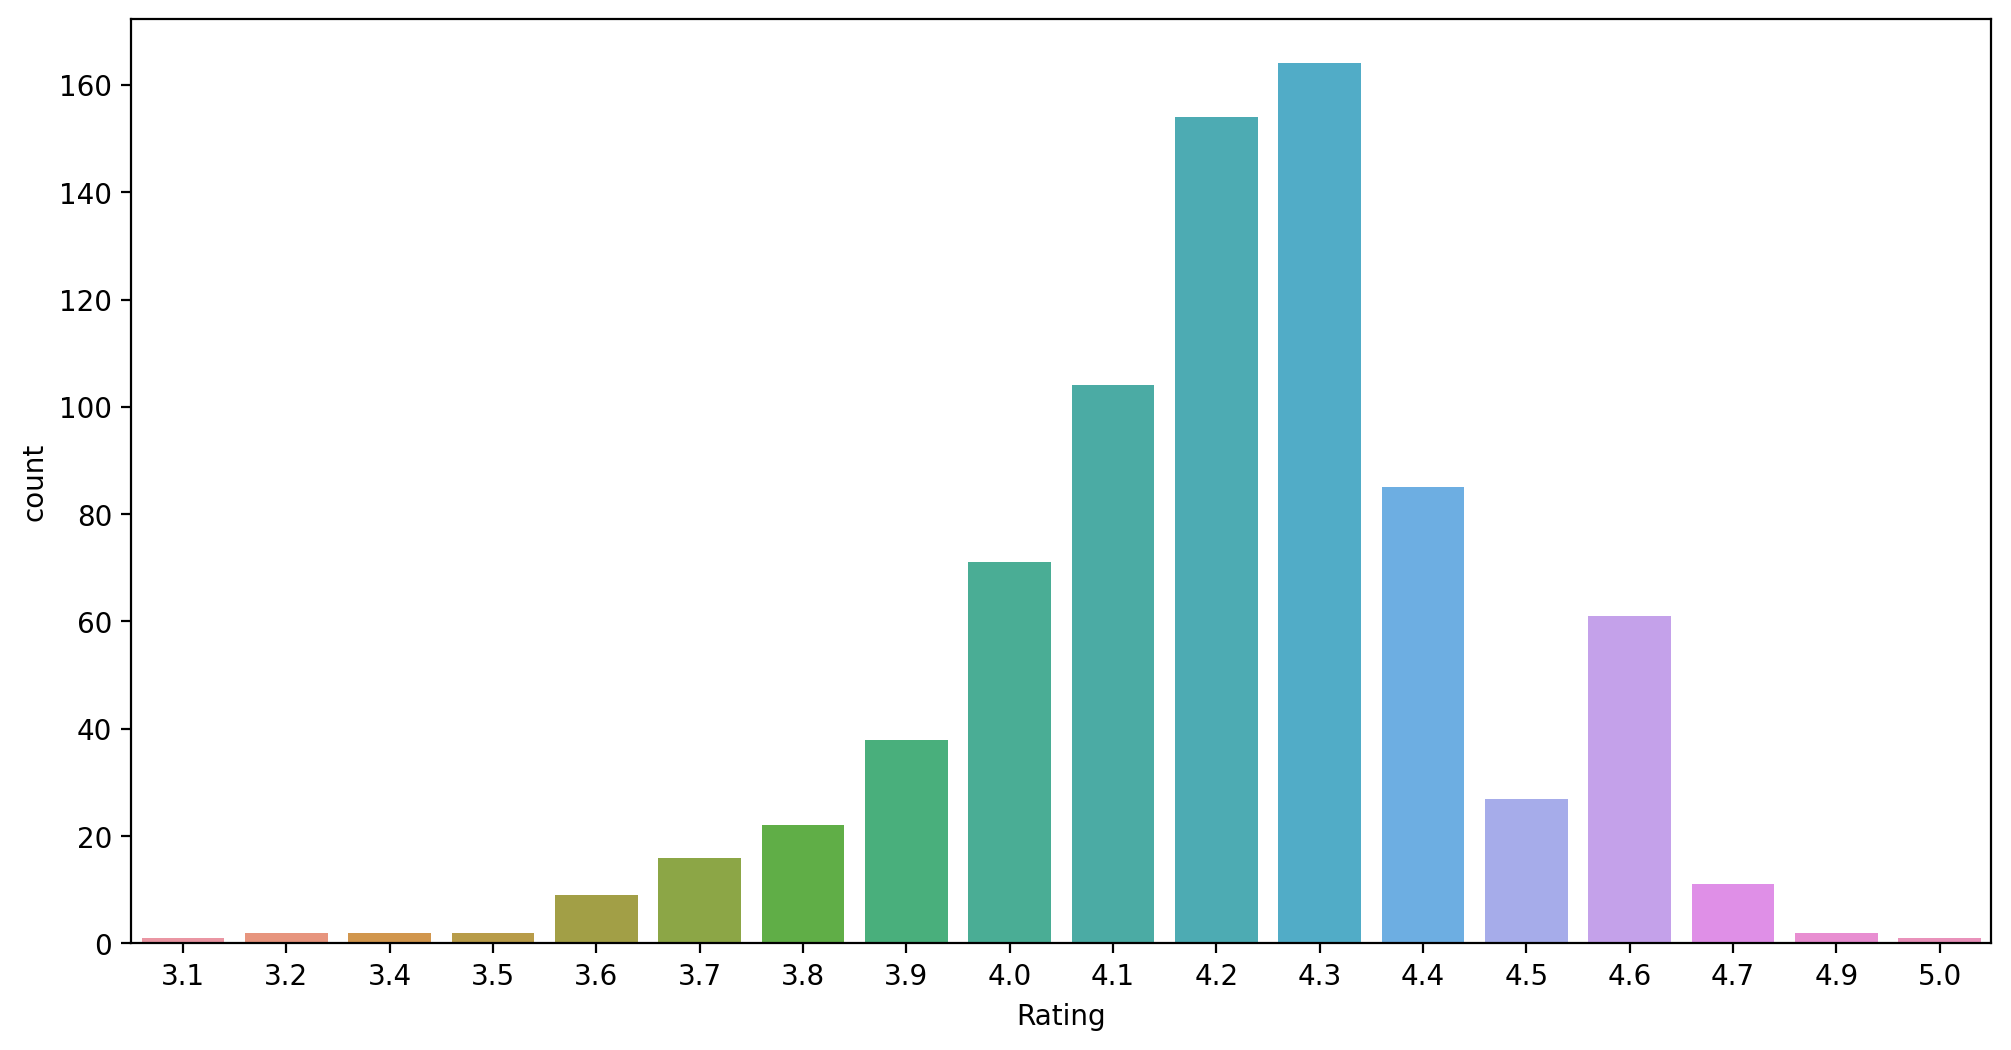

In [48]:
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = 'Rating', data =df)

<Axes: xlabel='Rating', ylabel='Price'>

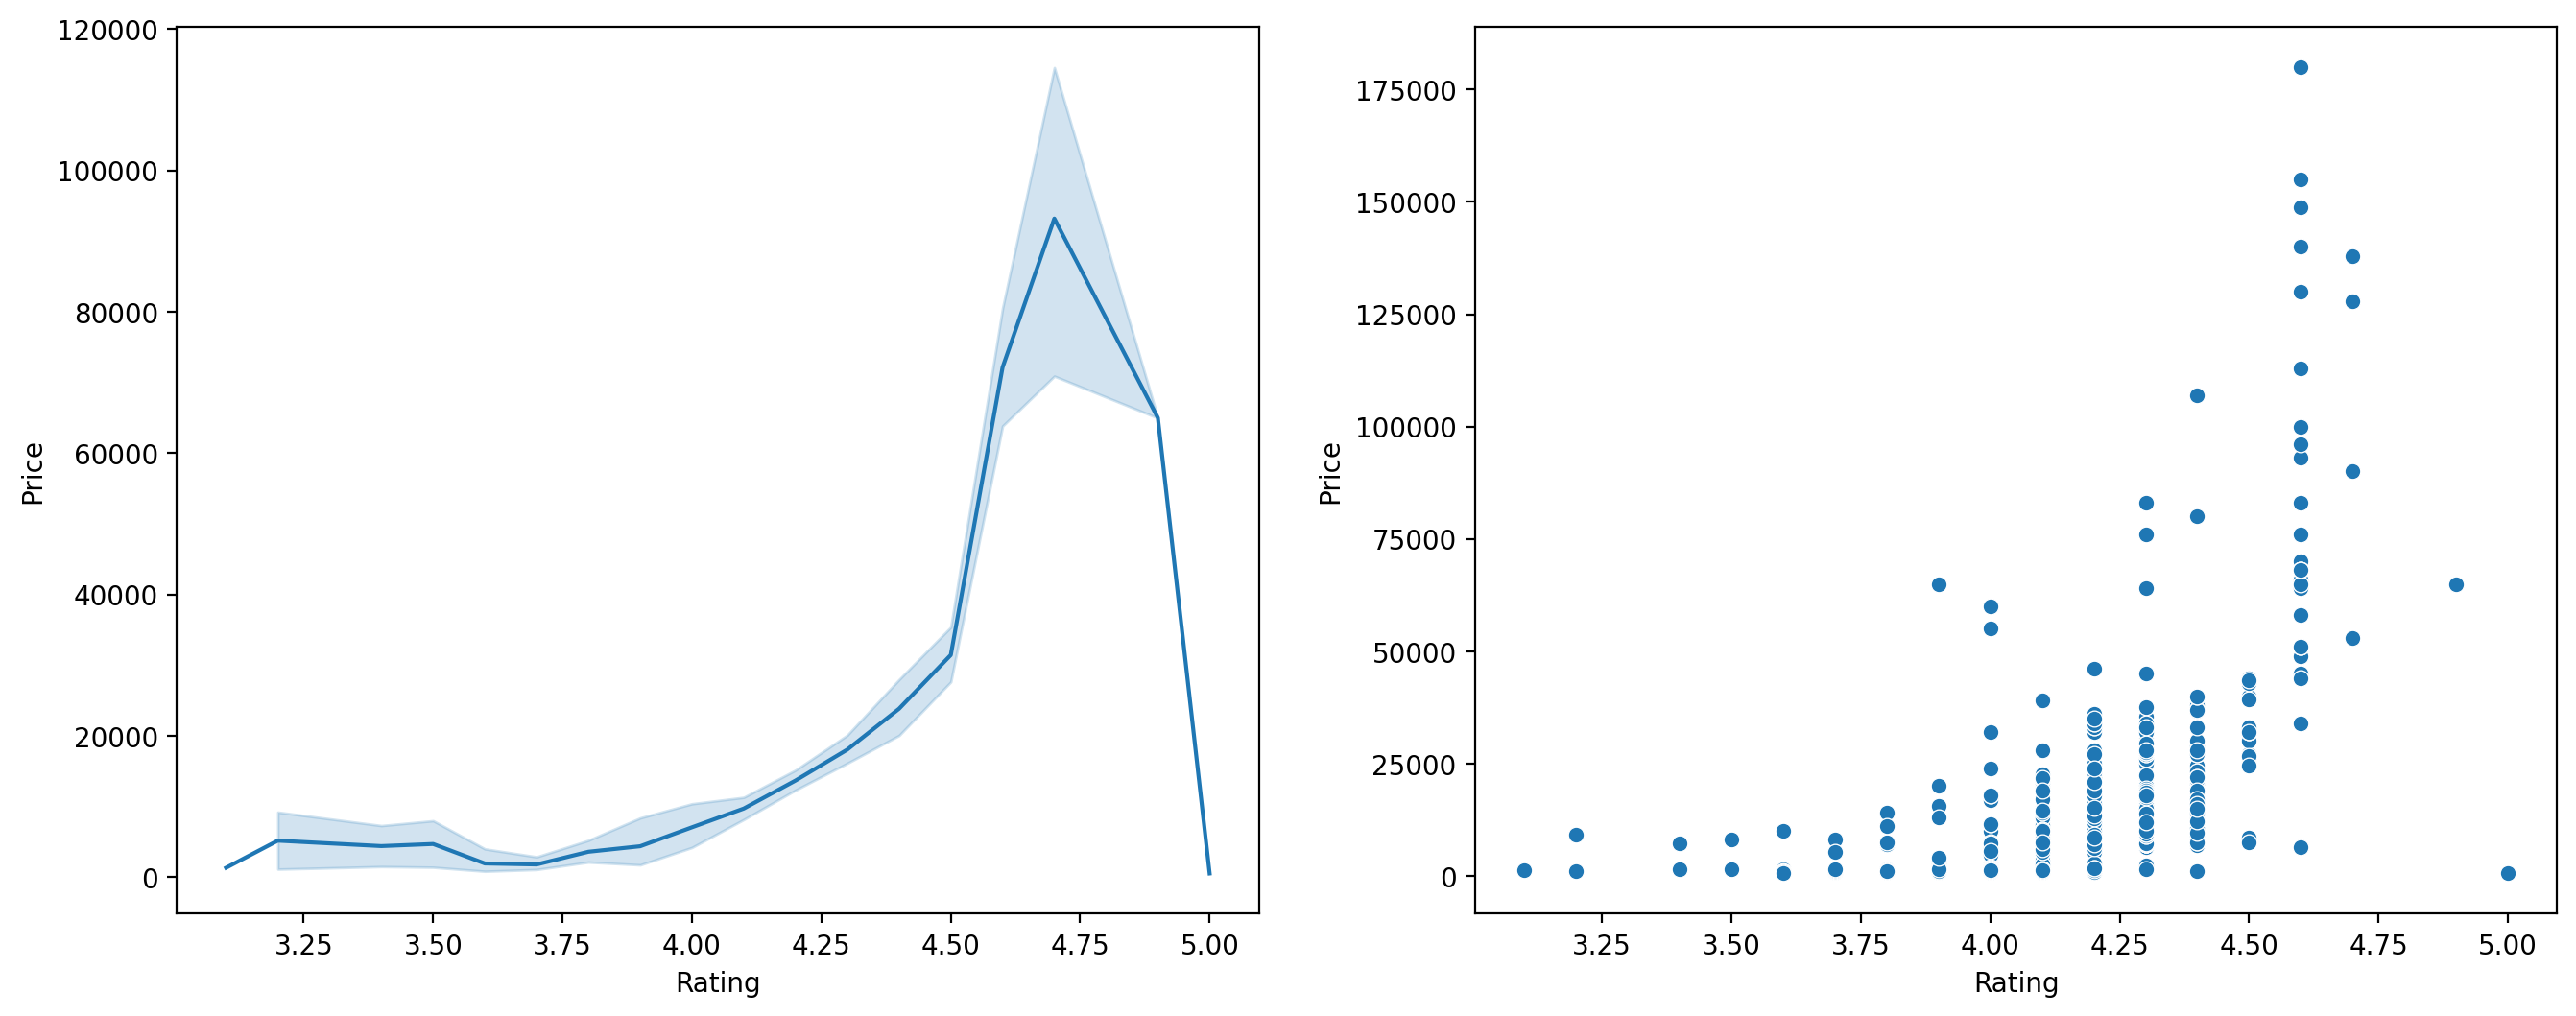

In [49]:
# rating with price
plt.figure(figsize = (16,6), dpi = 200)
plt.subplot(1,2,1)
sns.lineplot(x = 'Rating', y = 'Price', data = df )
plt.subplot(1,2,2)
sns.scatterplot(x = 'Rating', y = 'Price', data = df )

- **when price increses as well as rating also incrises** 

In [50]:
df.nunique()

Product_name        630
Price               380
Rating               18
Revieew_&_Rating    385
ROM_Feature         109
Display_Feature     109
Camera_Feature      152
Battery             103
dtype: int64

In [51]:
df['ROM_Feature'].value_counts()

8 GB RAM | 128 GB ROM                              86
8 GB RAM | 256 GB ROM                              57
32 MB RAM | 32 MB ROM                              48
6 GB RAM | 128 GB ROM | Expandable Upto 1 TB       43
6 GB RAM | 128 GB ROM                              38
                                                   ..
3 MB RAM | 64 GB ROM                                1
56 MB RAM | 512 MB ROM | Expandable Upto 128 GB     1
32 MB RAM | 16 MB ROM                               1
3 GB RAM | 32 GB ROM | Expandable Upto 1 TB         1
3 GB RAM | 32 GB ROM | Expandable Upto 128 GB       1
Name: ROM_Feature, Length: 109, dtype: int64

<Axes: xlabel='count', ylabel='ROM_Feature'>

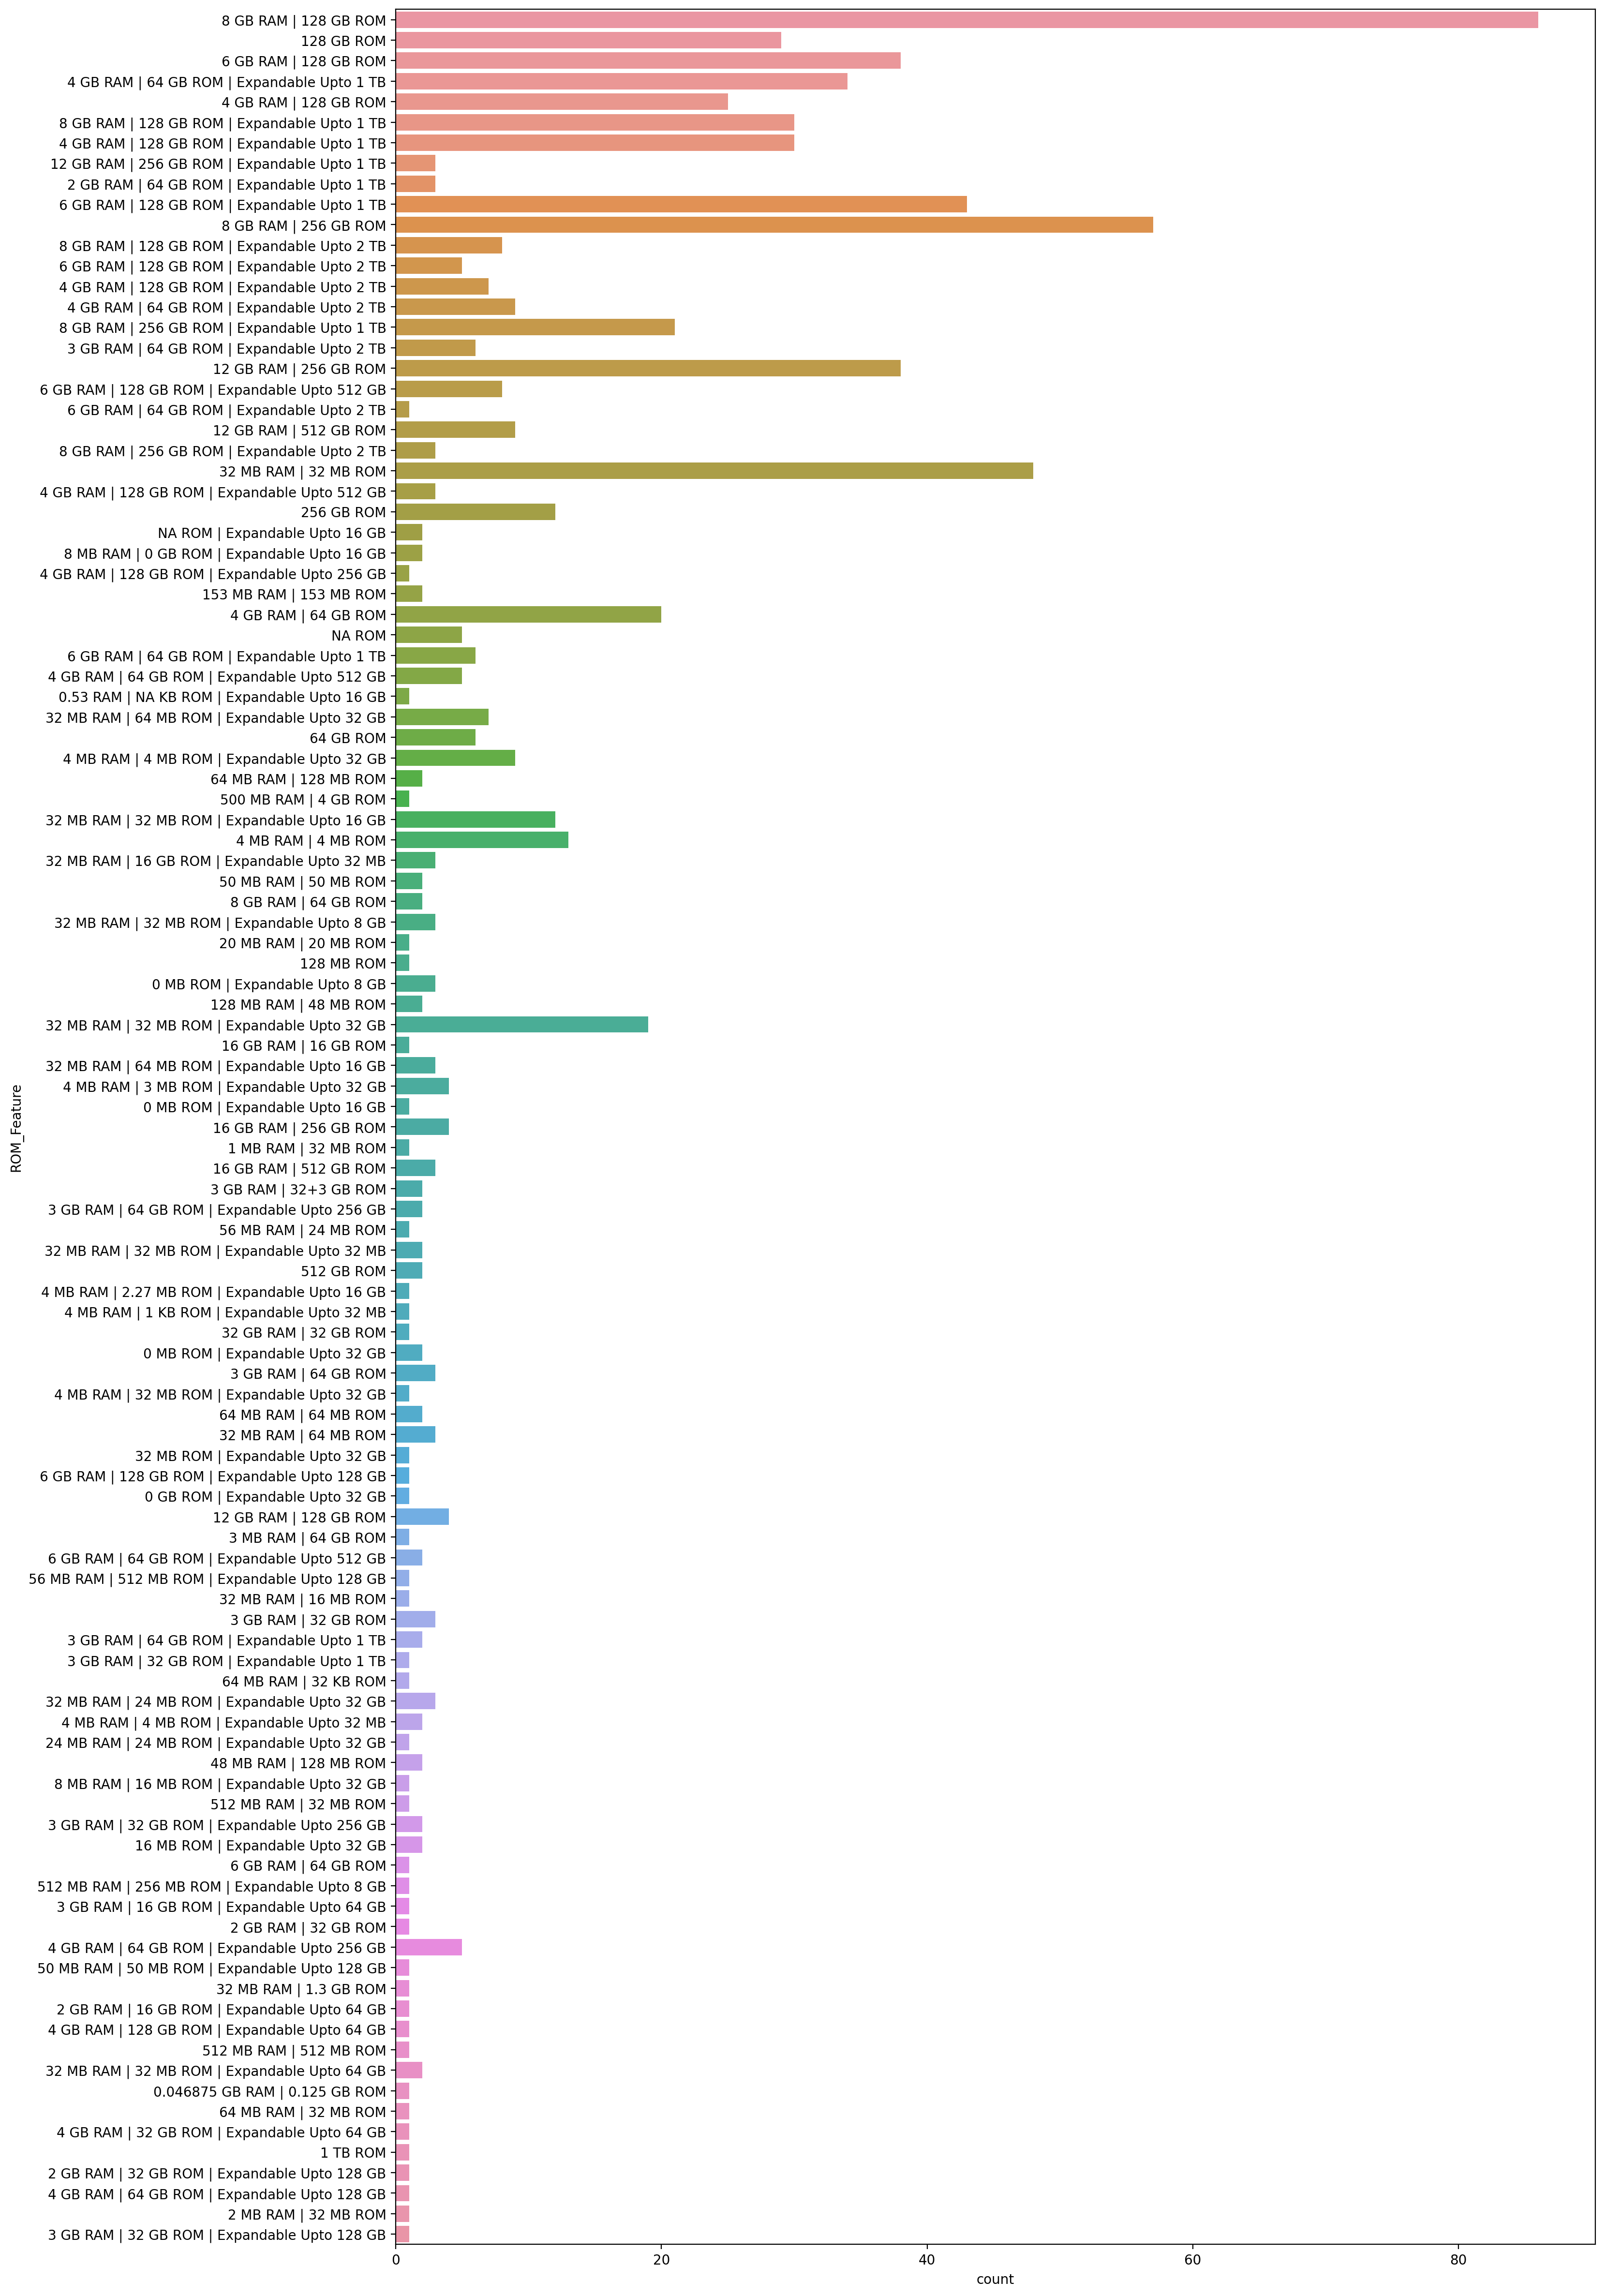

In [52]:
plt.figure(figsize = (16,30), dpi = 200)
sns.countplot(y = 'ROM_Feature', data =df)

- 8 GB RAM | 128 GB ROM  are options in heighest mobile phones

In [69]:
df.groupby('ROM_Feature')['Price'].mean().sort_values(ascending = False)

ROM_Feature
1 TB ROM                                         179900.000000
512 GB ROM                                       104499.000000
256 GB ROM                                        96321.833333
12 GB RAM | 128 GB ROM                            85499.000000
16 GB RAM | 512 GB ROM                            76665.666667
                                                     ...      
0 MB ROM | Expandable Upto 8 GB                     908.666667
4 MB RAM | 3 MB ROM | Expandable Upto 32 GB         906.500000
24 MB RAM | 24 MB ROM | Expandable Upto 32 GB       899.000000
56 MB RAM | 24 MB ROM                               899.000000
512 MB RAM | 512 MB ROM                             699.000000
Name: Price, Length: 109, dtype: float64

<Axes: xlabel='Price', ylabel='ROM_Feature'>

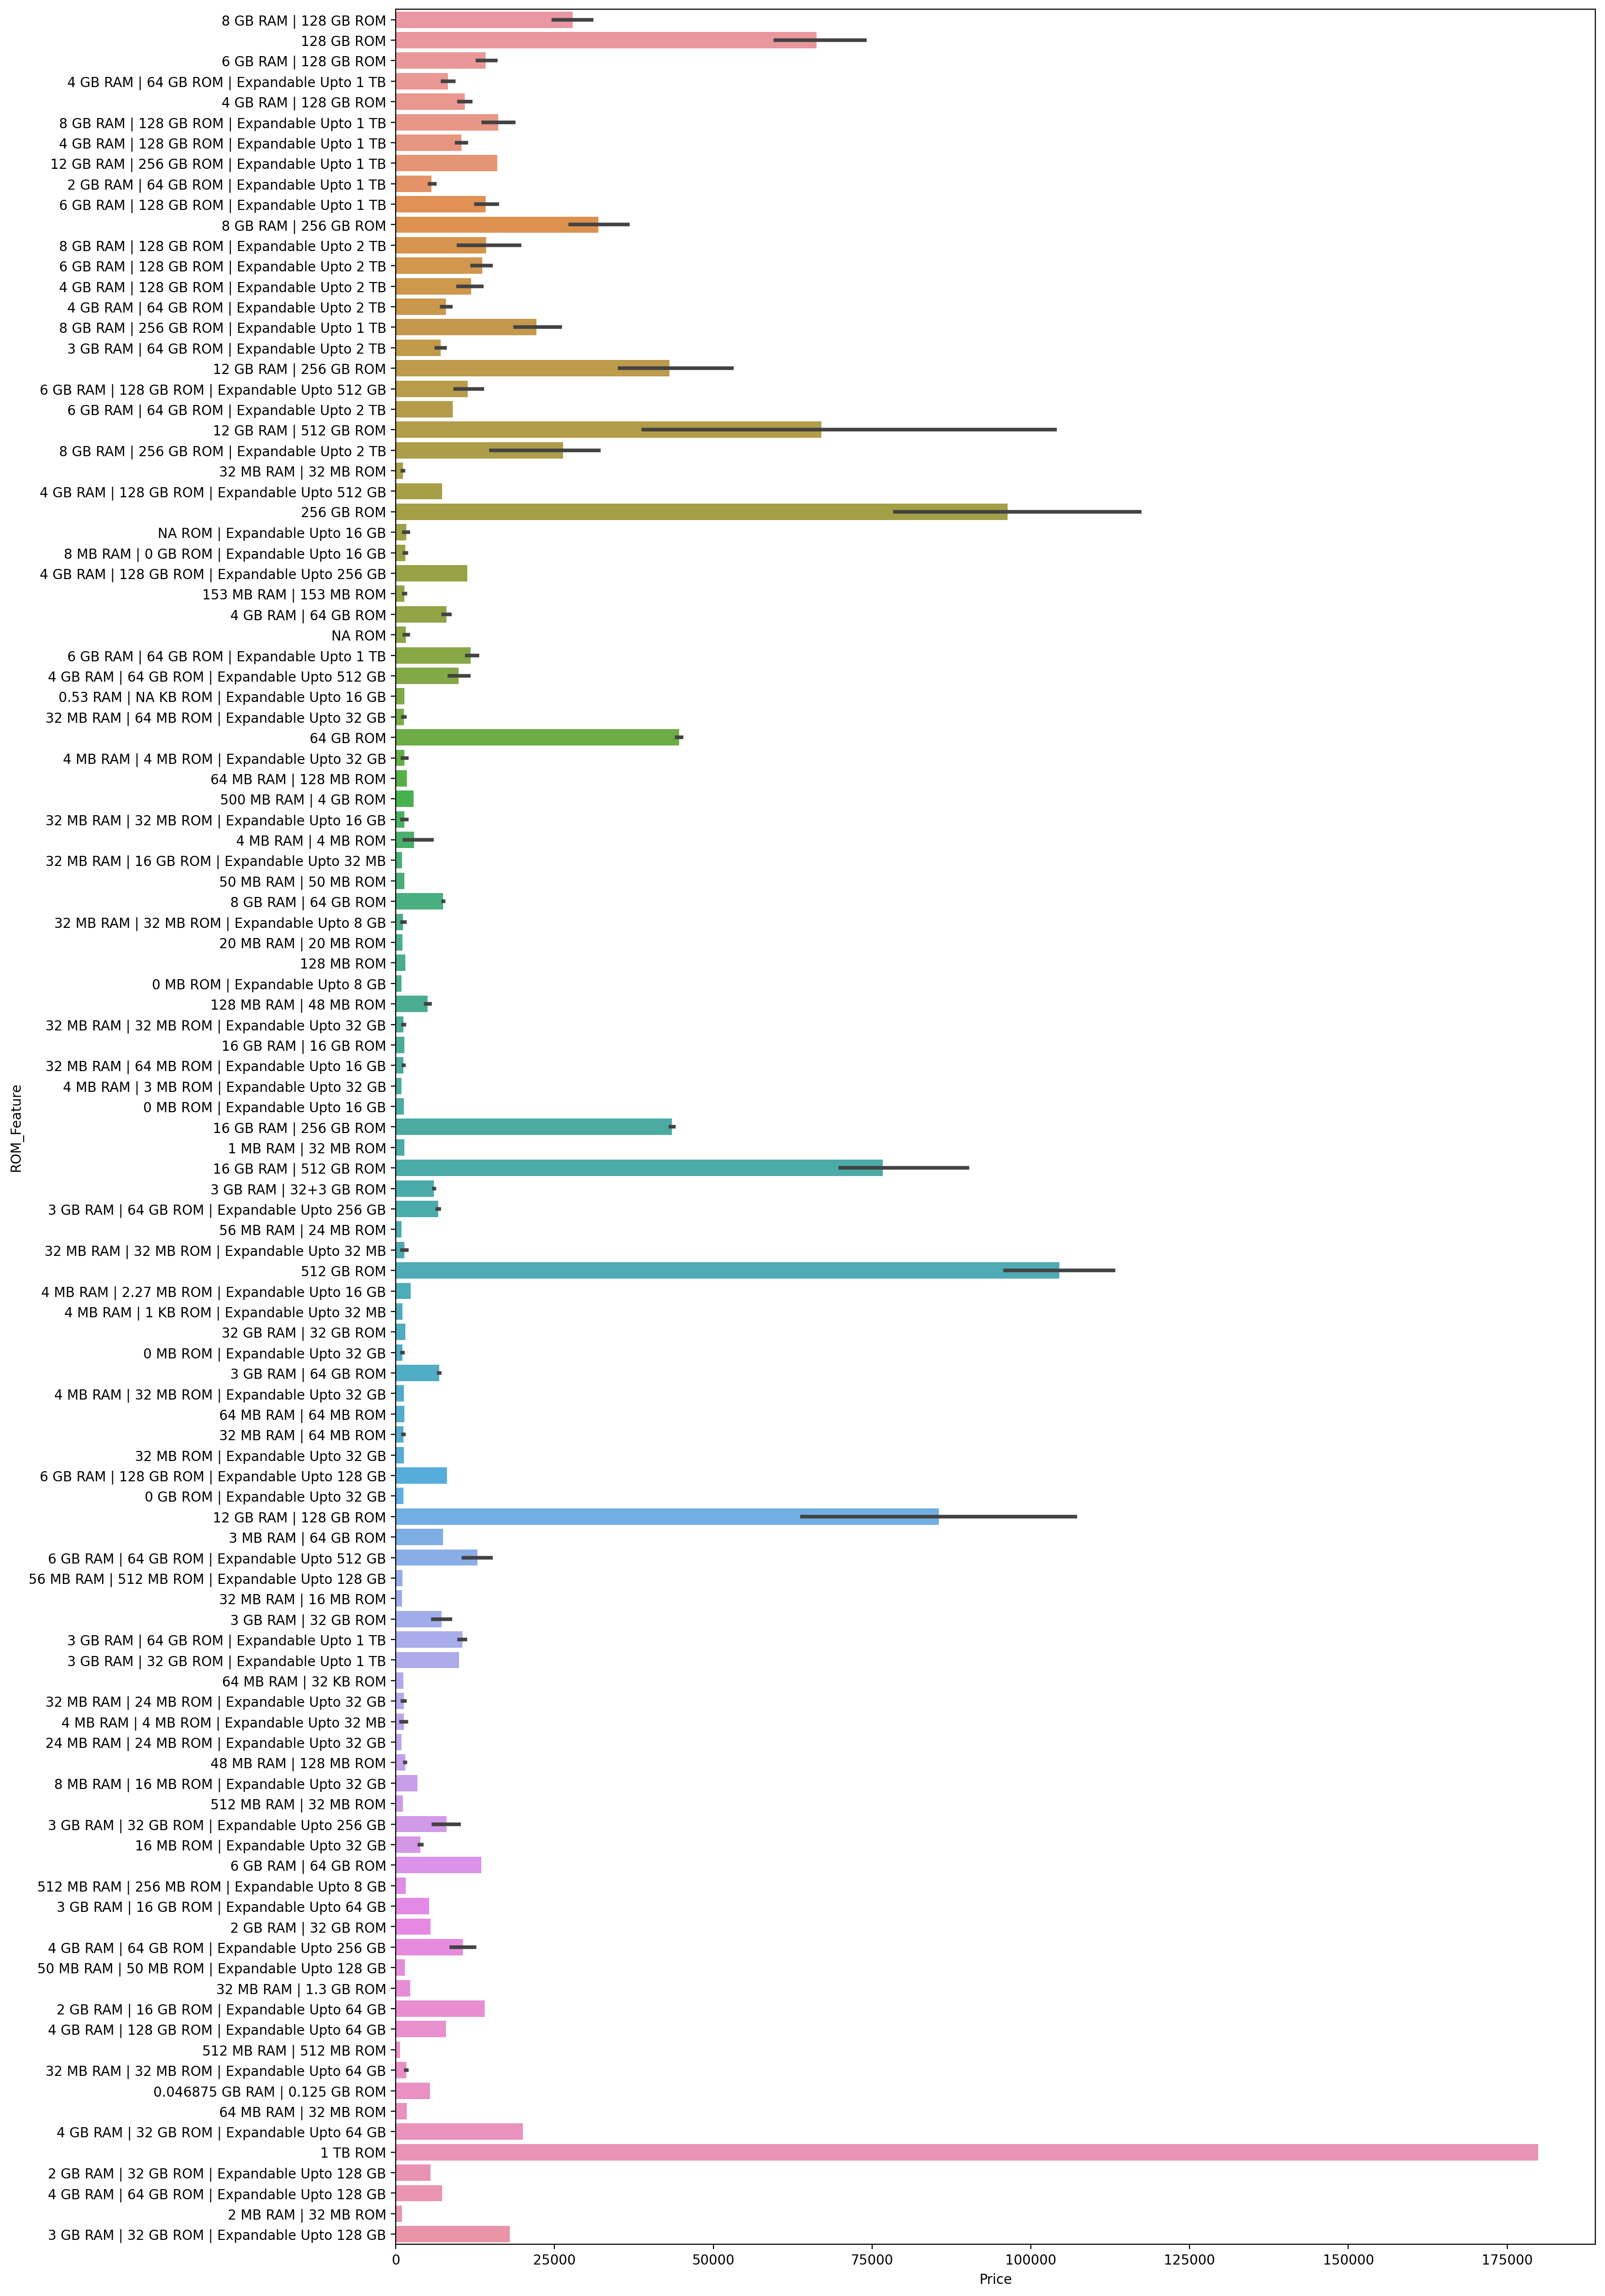

In [54]:
plt.figure(figsize = (16,30), dpi = 200)
sns.barplot(y = 'ROM_Feature',x = 'Price', data =df)

In [55]:
df['Display_Feature'].value_counts()

15.49 cm (6.1 inch) Super Retina XDR Display    34
16.76 cm (6.6 inch) HD+ Display                 32
16.66 cm (6.56 inch) HD+ Display                32
4.5 cm (1.77 inch) Display                      30
6.1 cm (2.4 inch) Display                       27
                                                ..
3.81 cm (1.5 inch) NA Display                    1
4.57 cm (1.8 inch) NA Display                    1
4.5 cm (1.77 inch) VGA Display                   1
5.16 cm (2.03 inch) QVGA Display                 1
15.75 cm (6.2 inch) Display                      1
Name: Display_Feature, Length: 109, dtype: int64

<Axes: xlabel='count', ylabel='Display_Feature'>

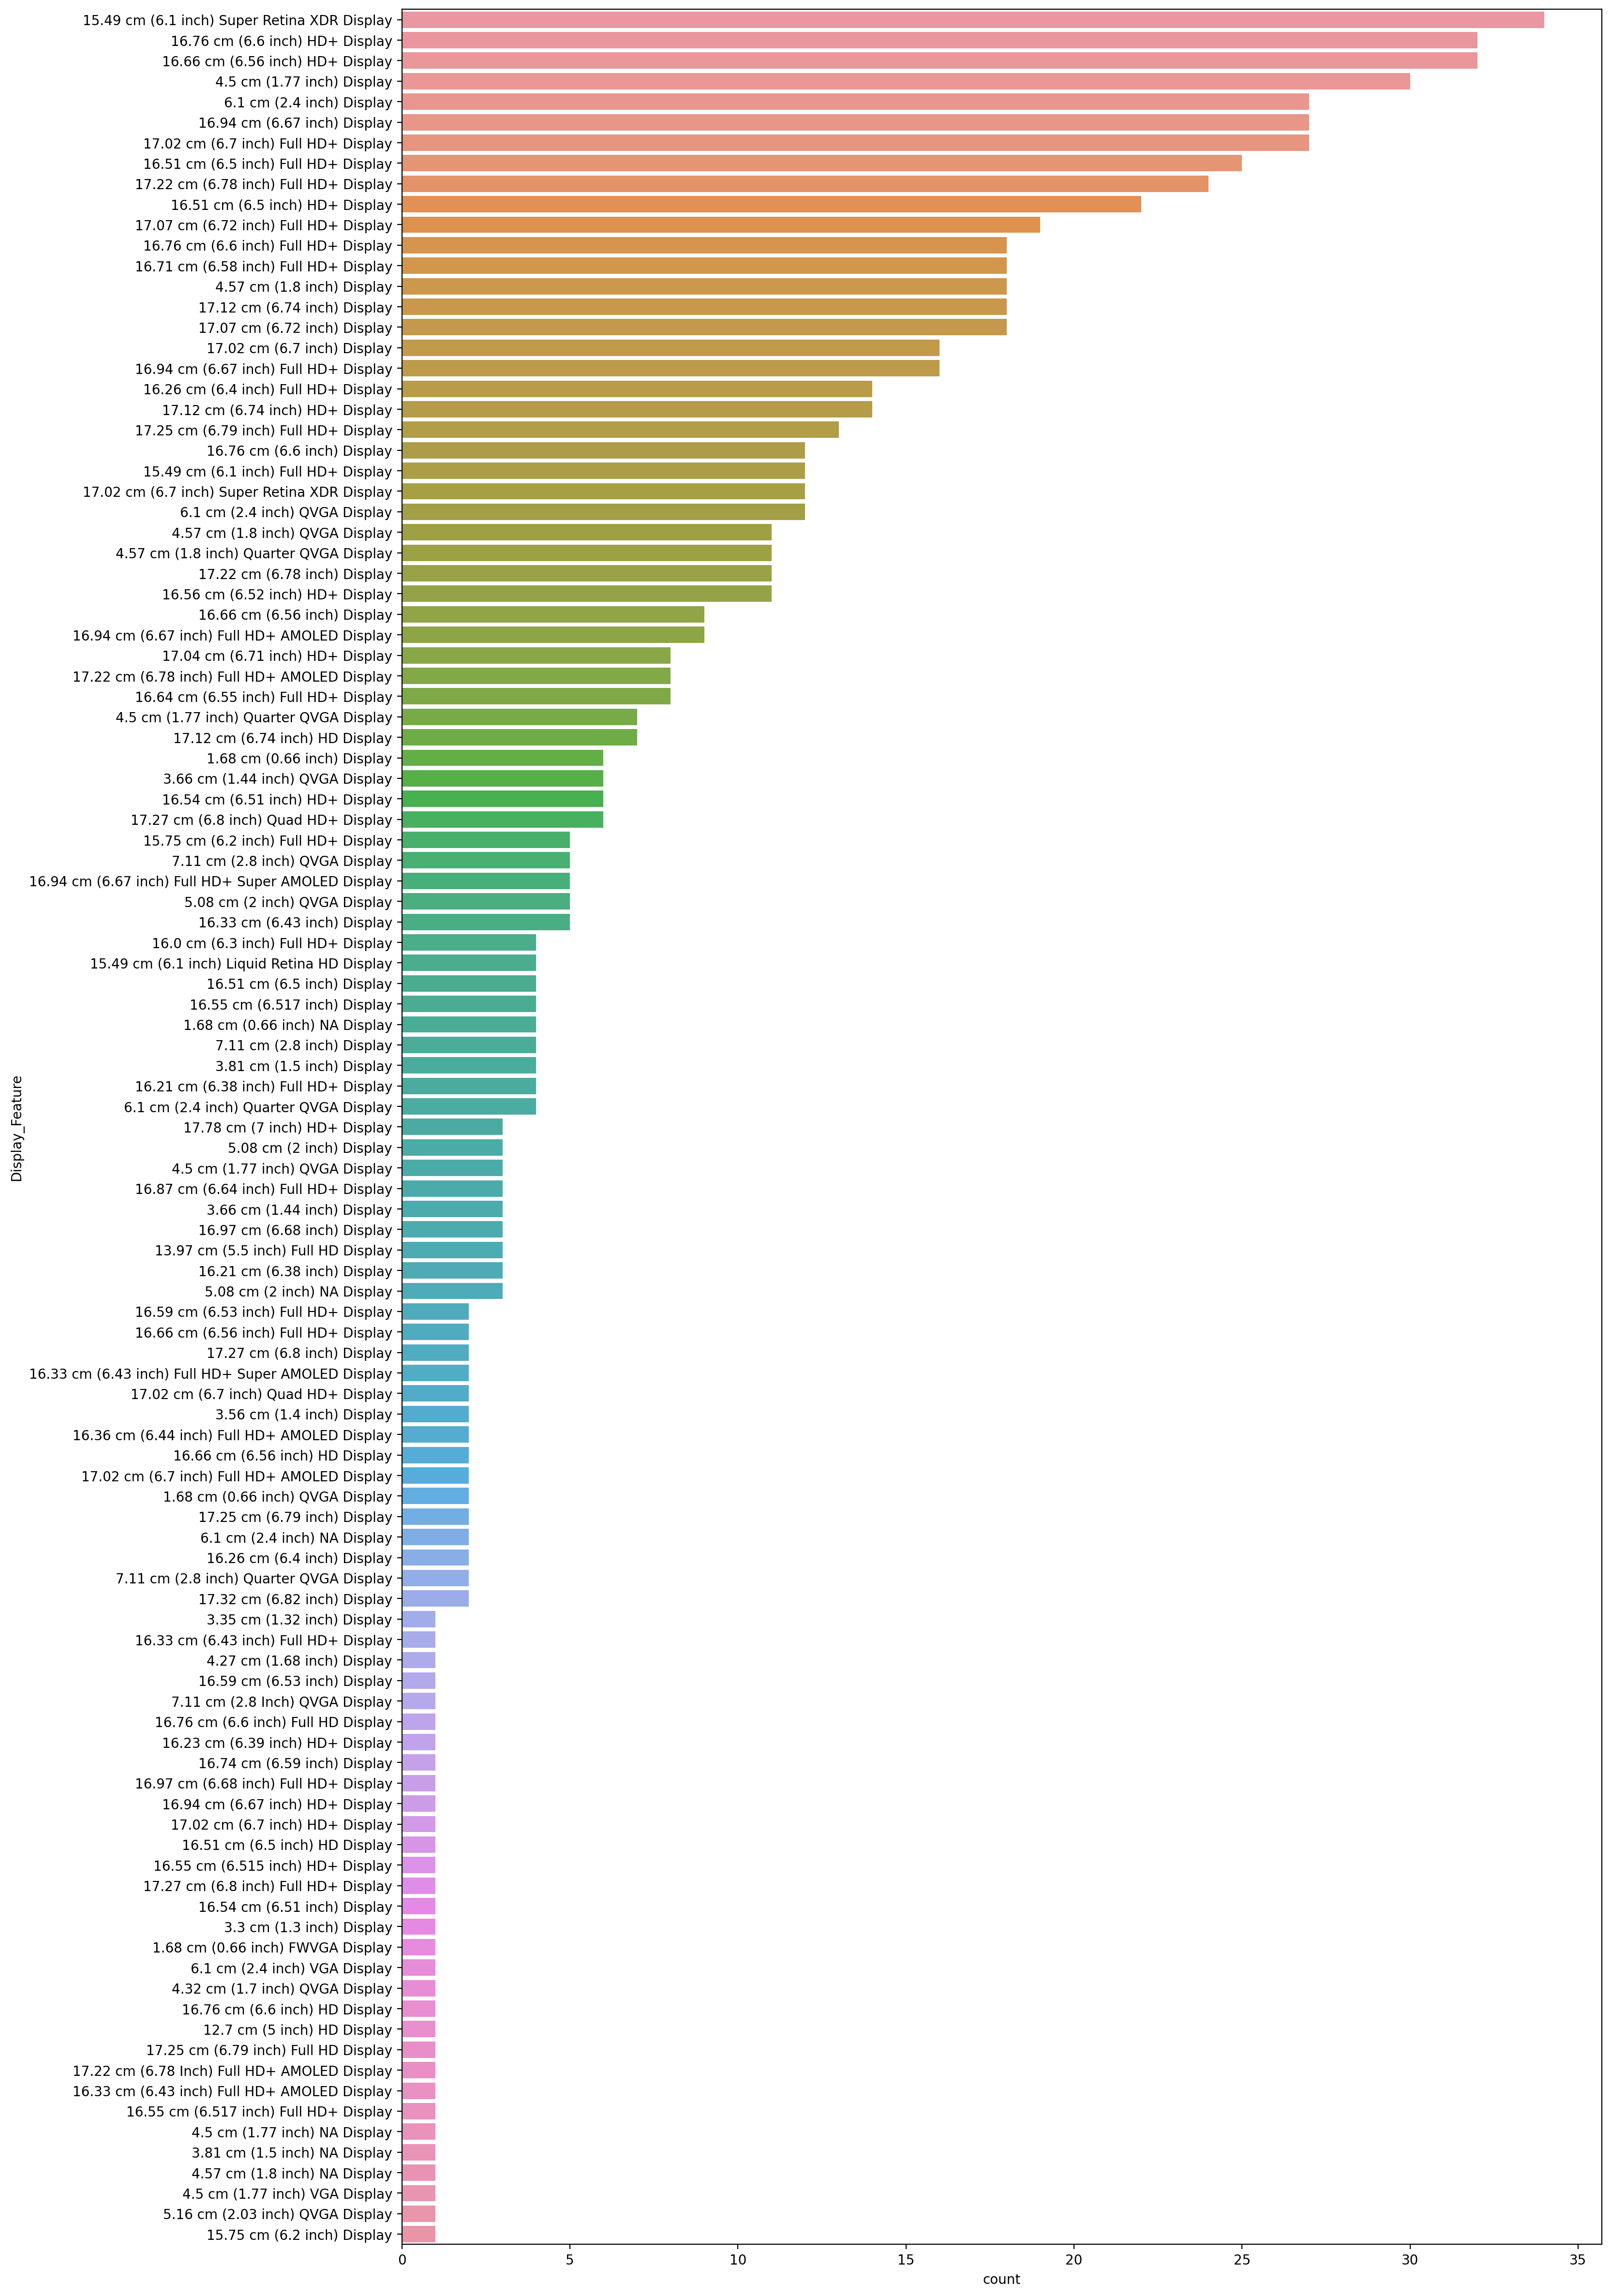

In [56]:
display_order = df['Display_Feature'].value_counts().index
plt.figure(figsize = (16,30), dpi = 200)
sns.countplot(y = 'Display_Feature', data =df, order = display_order)

- more phone are carry 15.49 cm (6.1 inch) Super Retina XDR Display.

In [65]:
df.groupby(by = 'Display_Feature').Price.mean().sort_values(ascending = False)

Display_Feature
15.75 cm (6.2 inch) Display                     154999.000000
17.27 cm (6.8 inch) Quad HD+ Display            124999.000000
17.02 cm (6.7 inch) Full HD+ AMOLED Display     106999.000000
17.02 cm (6.7 inch) Super Retina XDR Display     94232.500000
15.75 cm (6.2 inch) Full HD+ Display             78999.000000
                                                    ...      
1.68 cm (0.66 inch) FWVGA Display                  999.000000
1.68 cm (0.66 inch) NA Display                     999.000000
1.68 cm (0.66 inch) QVGA Display                   994.000000
4.57 cm (1.8 inch) QVGA Display                    972.363636
1.68 cm (0.66 inch) Display                        971.333333
Name: Price, Length: 109, dtype: float64

<Axes: xlabel='Price', ylabel='Display_Feature'>

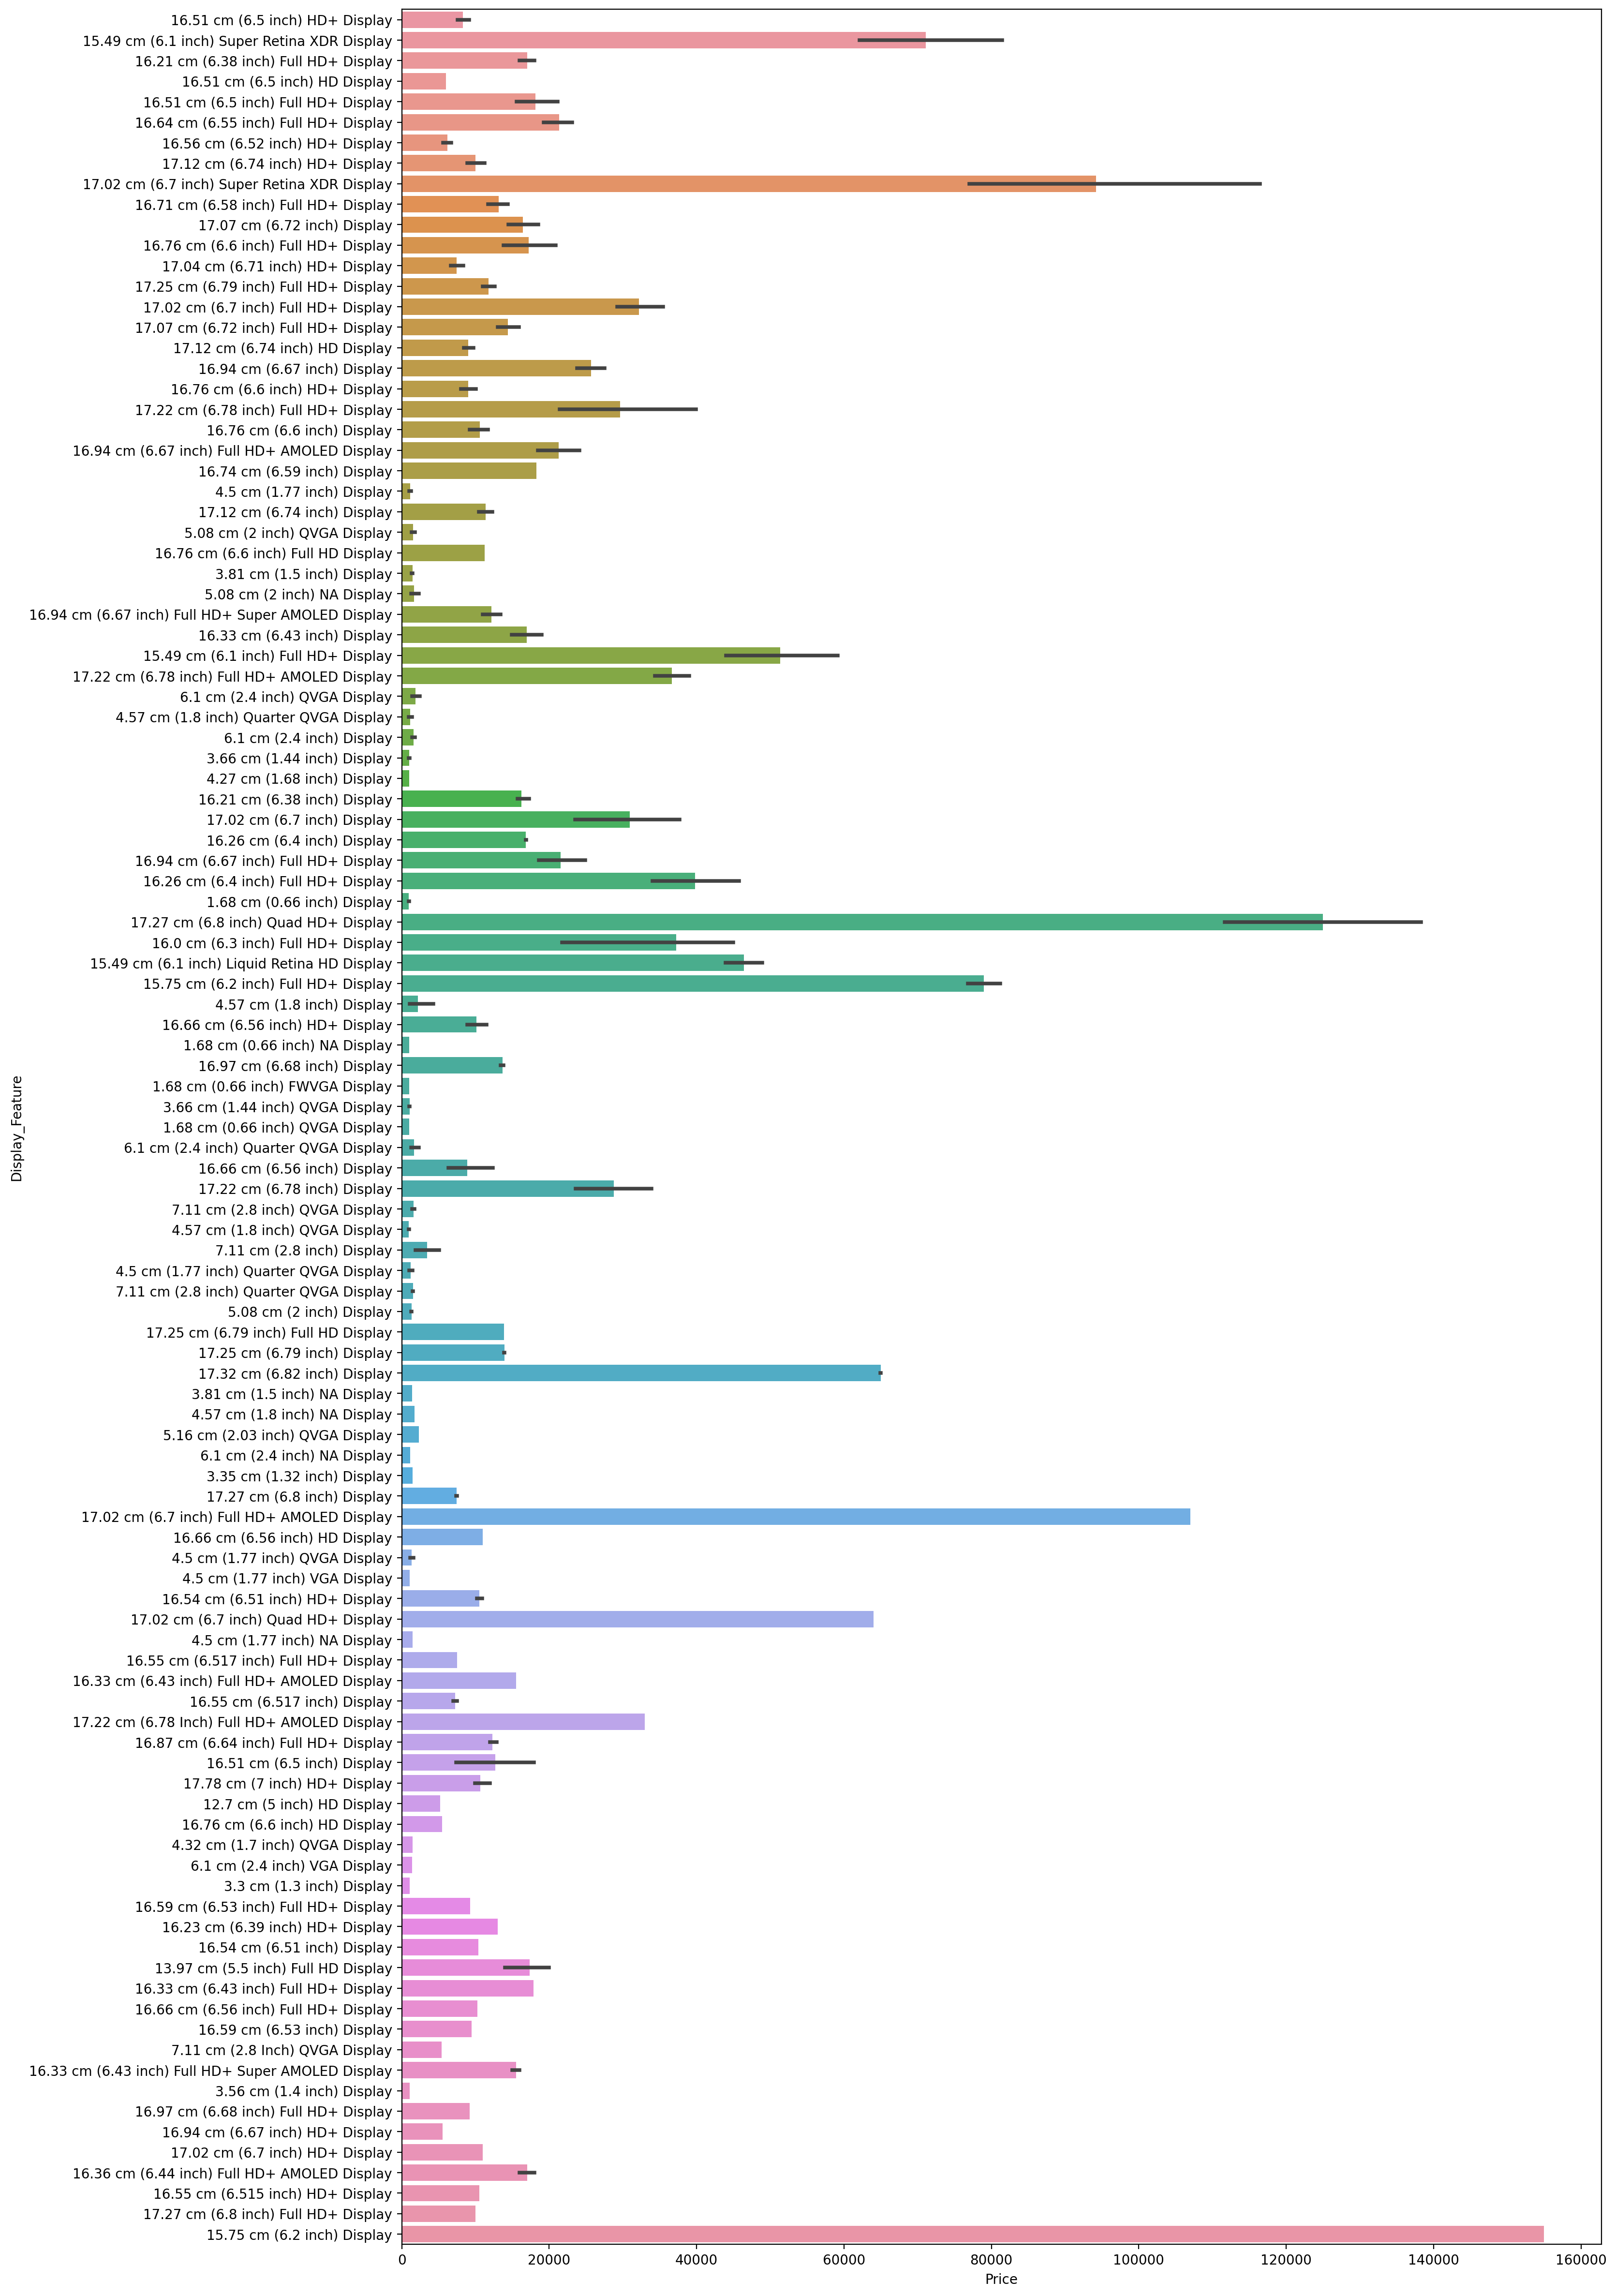

In [60]:
plt.figure(figsize = (16,30), dpi = 200)
sns.barplot(y = 'Display_Feature',x = 'Price', data =df)

In [57]:
df.head(2)

Product_name    Price  Rating  \
0  Motorola G34 5G (Ocean Green, 128 GB)  11999.0     4.2   
1         Apple iPhone 15 (Blue, 128 GB)  65999.0     4.6   

               Revieew_&_Rating            ROM_Feature  \
0   5,217 Ratings & 736 Reviews  8 GB RAM | 128 GB ROM   
1  13,234 Ratings & 896 Reviews             128 GB ROM   

                                Display_Feature  \
0               16.51 cm (6.5 inch) HD+ Display   
1  15.49 cm (6.1 inch) Super Retina XDR Display   

                    Camera_Feature  \
0   50MP + 2MP | 16MP Front Camera   
1  48MP + 12MP | 12MP Front Camera   

                                       Battery  
0                             5000 mAh Battery  
1  A16 Bionic Chip, 6 Core Processor Processor

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      783 non-null    object 
 1   Price             783 non-null    float64
 2   Rating            772 non-null    float64
 3   Revieew_&_Rating  772 non-null    object 
 4   ROM_Feature       783 non-null    object 
 5   Display_Feature   783 non-null    object 
 6   Camera_Feature    783 non-null    object 
 7   Battery           783 non-null    object 
dtypes: float64(2), object(6)
memory usage: 55.1+ KB


In [73]:
df.groupby(by = 'Camera_Feature').Price.mean().sort_values(ascending = False)

Camera_Feature
12MP + 12MP + 12MP | 12MP Front Camera            179900.0
50MP + 12MP + 10MP                                154999.0
200MP + 50MP + 12MP + 10MP | 12MP Front Camera    137499.0
48MP + 12MP + 12MP | 12MP Front Camera            136475.0
50MP + 48MP + 48MP | 10.5MP Front Camera          106999.0
                                                    ...   
1000 mAh Li-ion Battery                             1018.0
300 mAh Battery                                      999.0
620 mAh Battery                                      906.5
0MP                                                  896.0
0.5MP Rear Camera                                    699.0
Name: Price, Length: 152, dtype: float64

<Axes: xlabel='Price', ylabel='Camera_Feature'>

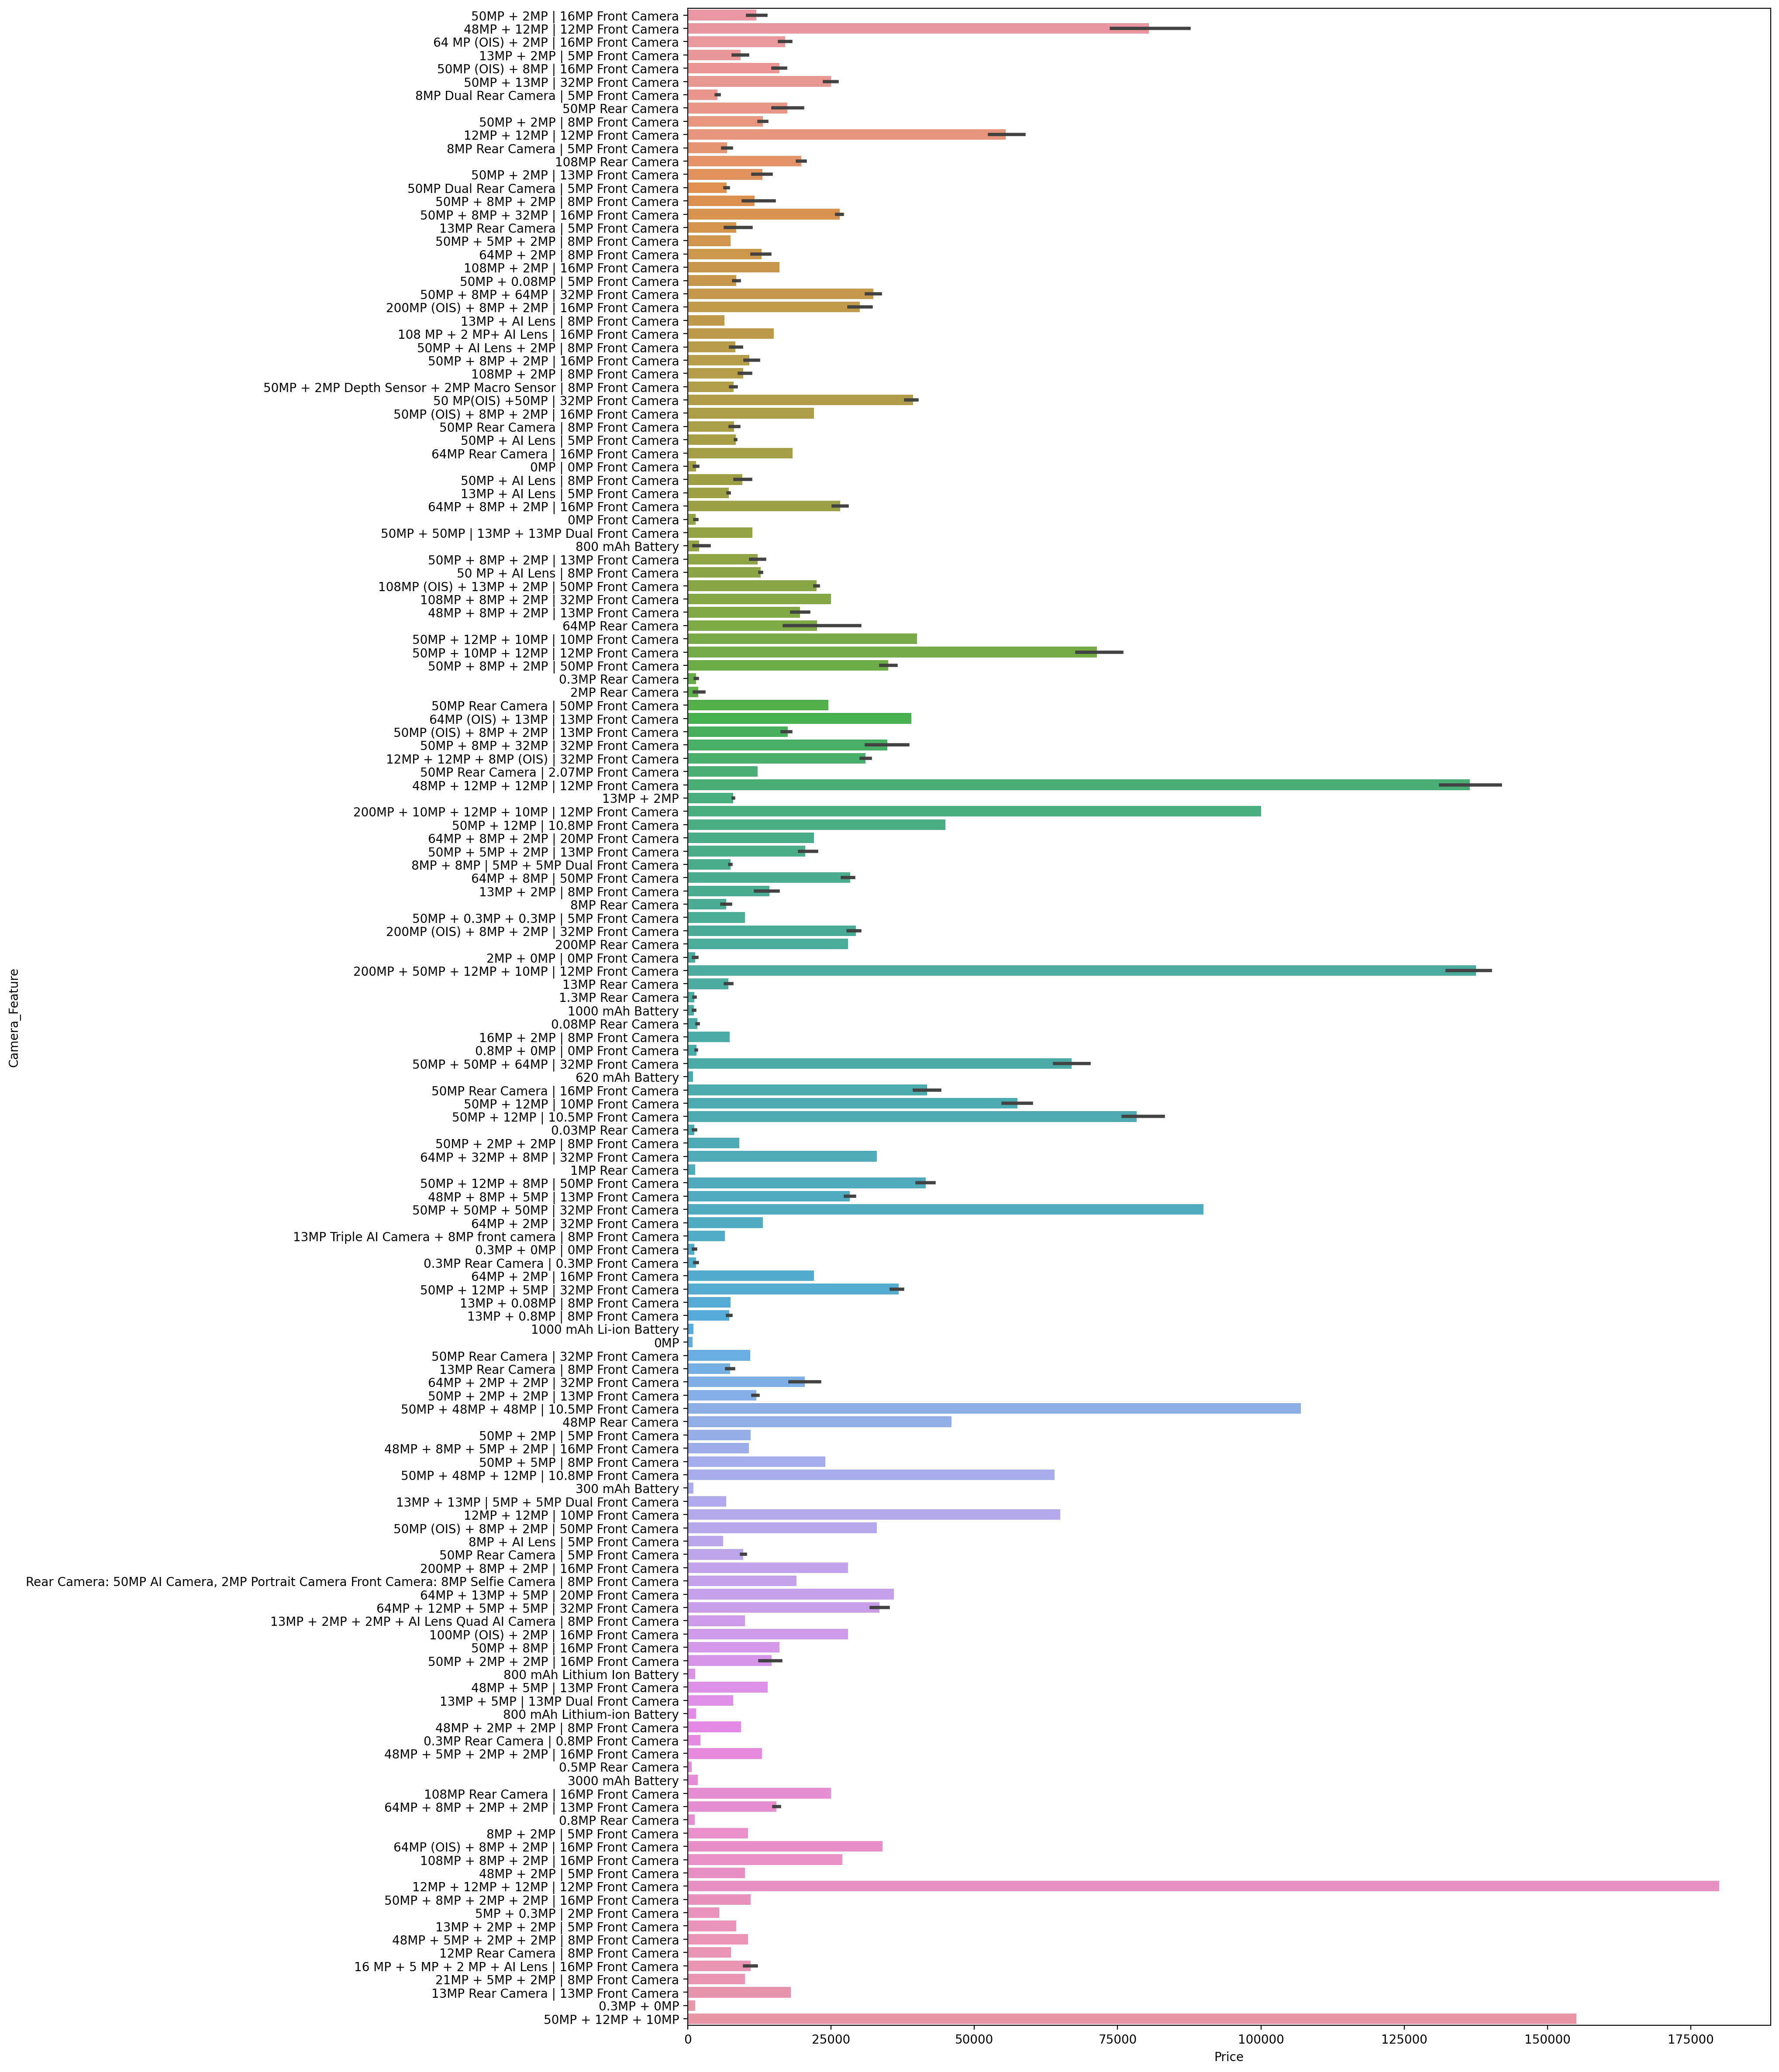

In [74]:
plt.figure(figsize = (16,30), dpi = 200)
sns.barplot(y = 'Camera_Feature',x = 'Price', data =df)

In [76]:
df.groupby(by = 'Battery').Price.mean().sort_values(ascending = False)

Battery
A17 Pro Chip, 6 Core Processor Processor                                                                                                           136475.000000
5050 mAh Battery                                                                                                                                   106999.000000
A16 Bionic Chip, 6 Core Processor Processor                                                                                                         80427.571429
4575 mAh Battery                                                                                                                                    78332.333333
A15 Bionic Chip Processor                                                                                                                           74149.166667
                                                                                                                                                       ...      
NO WARRANTY               

<Axes: xlabel='Price', ylabel='Battery'>

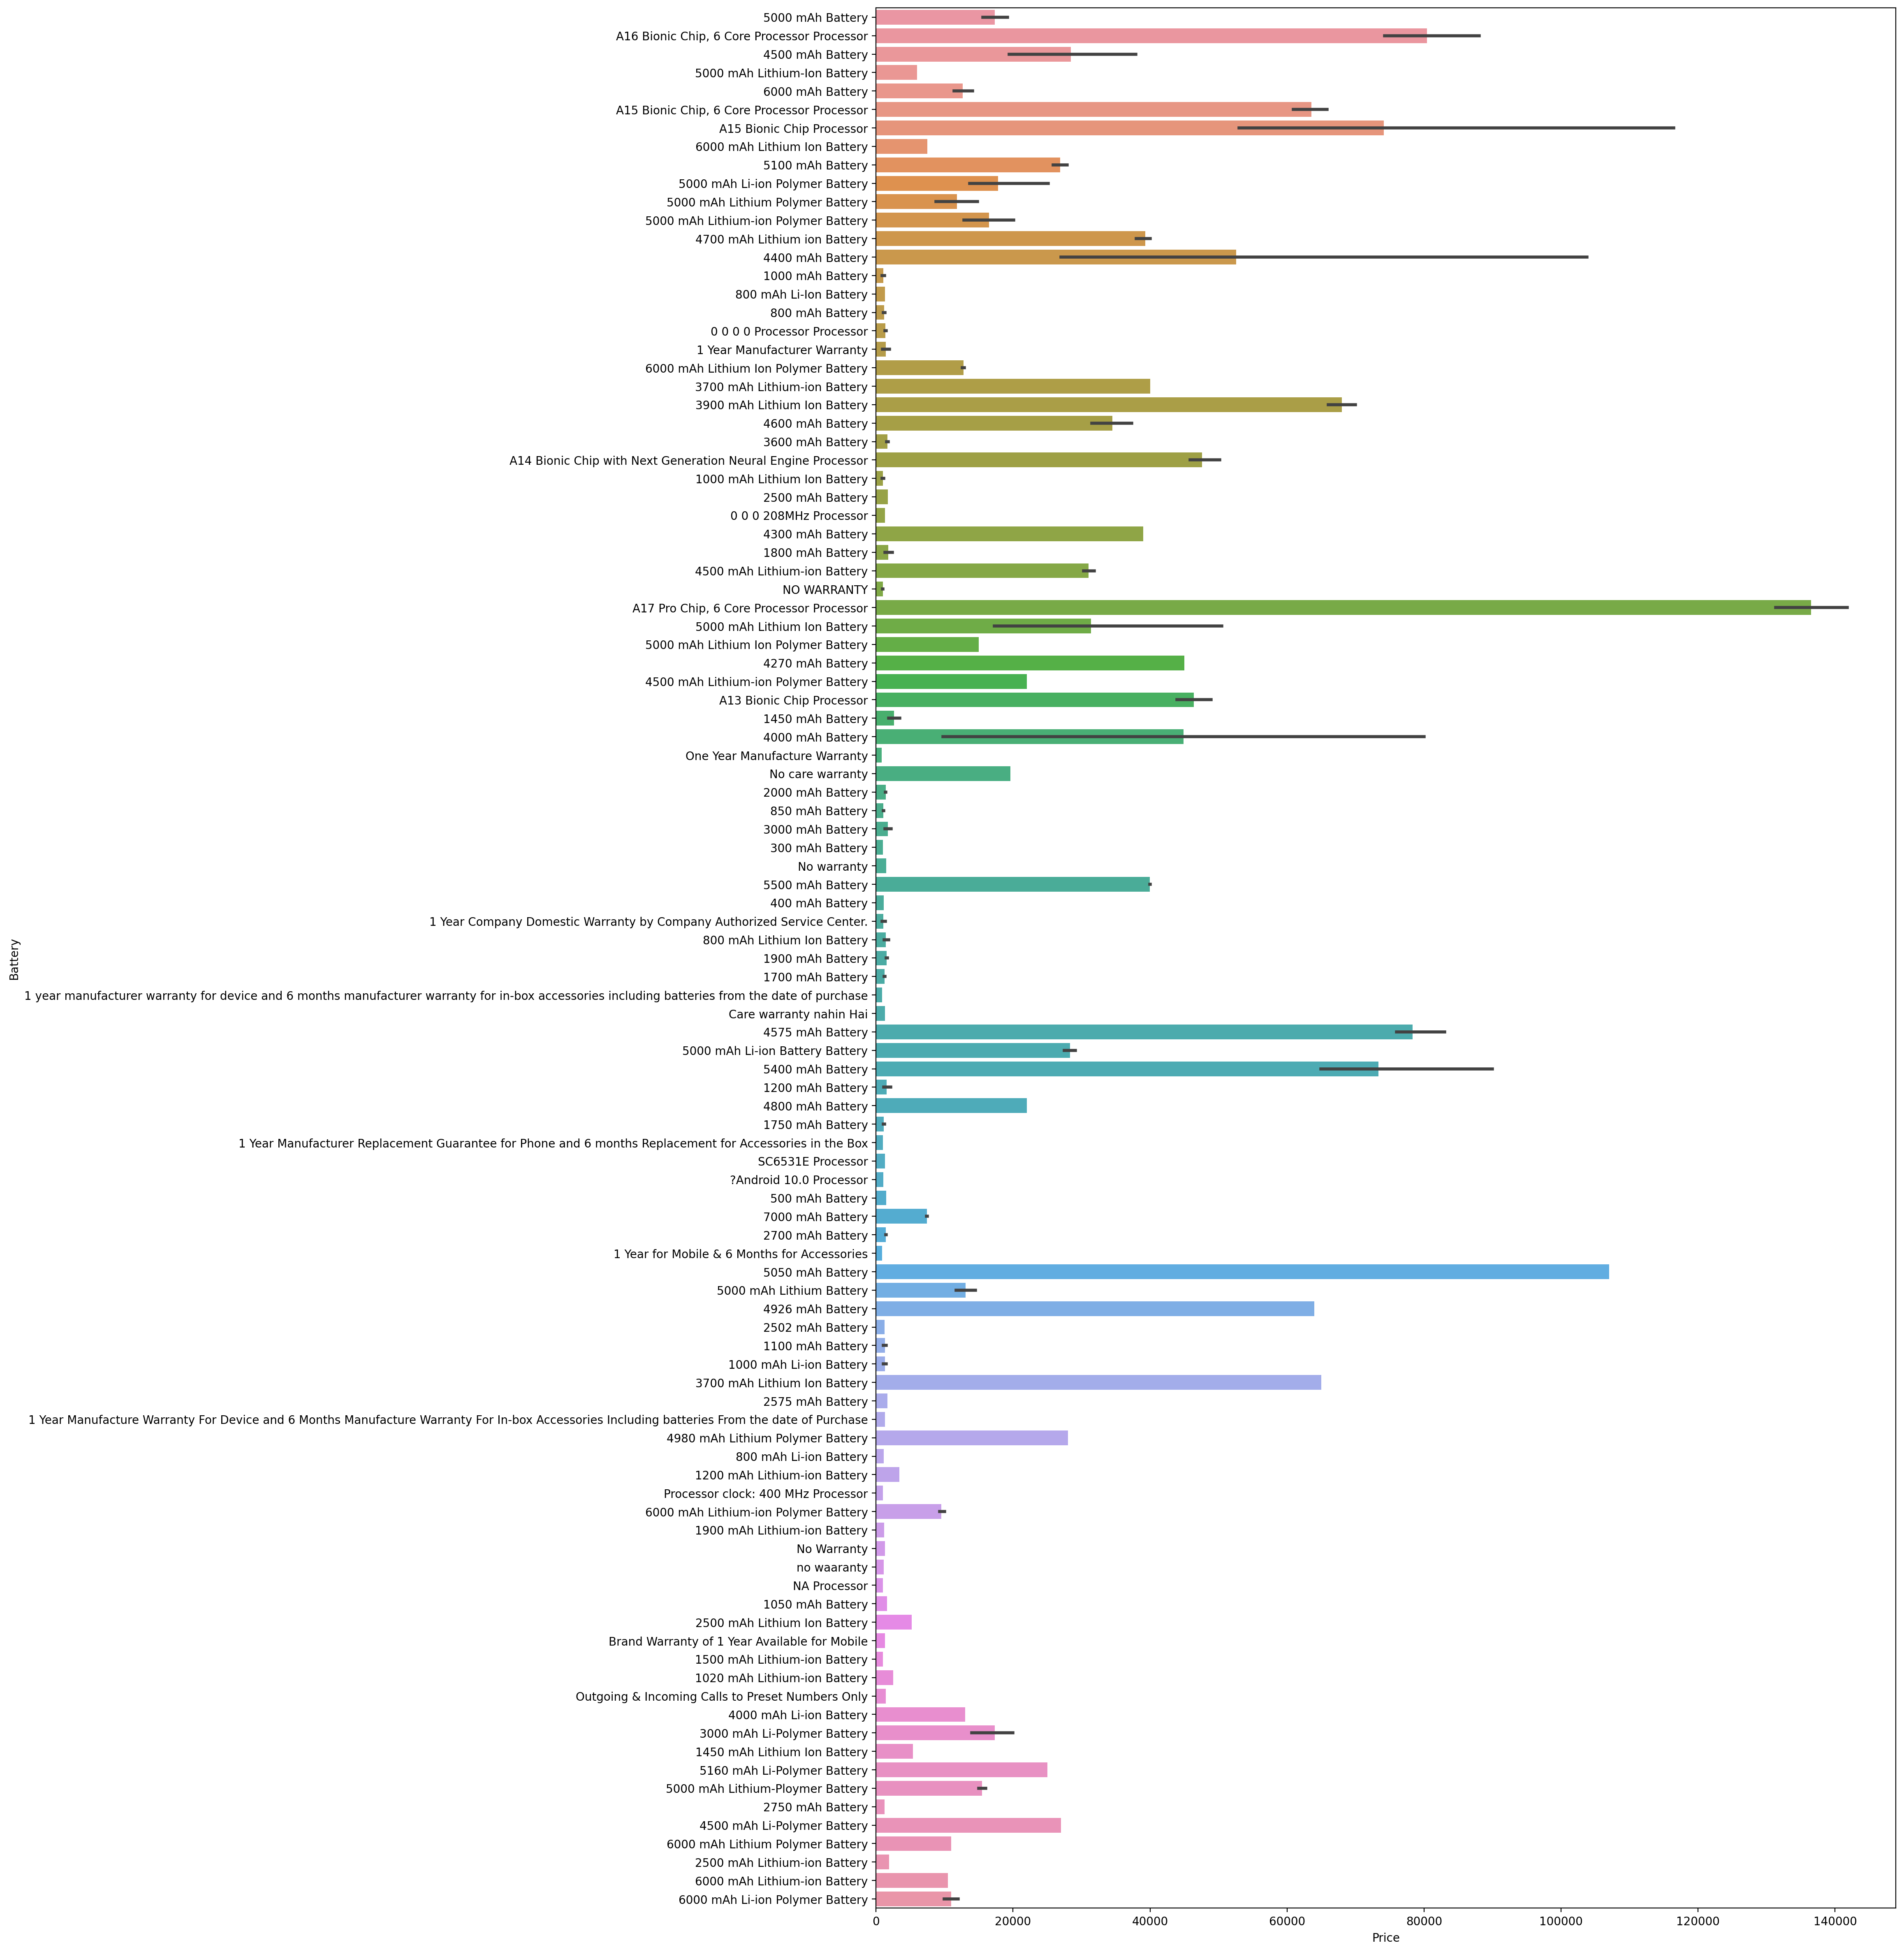

In [75]:
plt.figure(figsize = (16,30), dpi = 200)
sns.barplot(y = 'Battery',x = 'Price', data =df)